<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Business-Understanding" data-toc-modified-id="Business-Understanding-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Business Understanding</a></span></li><li><span><a href="#Data-Understanding" data-toc-modified-id="Data-Understanding-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Understanding</a></span></li><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Preparation</a></span></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#Preprocessing-Class" data-toc-modified-id="Preprocessing-Class-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Preprocessing Class</a></span></li><li><span><a href="#Grid-Search" data-toc-modified-id="Grid-Search-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Grid Search</a></span></li><li><span><a href="#Model-Performance-Visualization" data-toc-modified-id="Model-Performance-Visualization-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Model Performance Visualization</a></span></li><li><span><a href="#Shallow-Learning" data-toc-modified-id="Shallow-Learning-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Shallow Learning</a></span><ul class="toc-item"><li><span><a href="#Naive-Bayes" data-toc-modified-id="Naive-Bayes-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>Naive Bayes</a></span></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-4.4.2"><span class="toc-item-num">4.4.2&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-4.4.3"><span class="toc-item-num">4.4.3&nbsp;&nbsp;</span>Random Forest</a></span></li></ul></li><li><span><a href="#Gradient-Boosting" data-toc-modified-id="Gradient-Boosting-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Gradient Boosting</a></span><ul class="toc-item"><li><span><a href="#XGBoost" data-toc-modified-id="XGBoost-4.5.1"><span class="toc-item-num">4.5.1&nbsp;&nbsp;</span>XGBoost</a></span></li><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-4.5.2"><span class="toc-item-num">4.5.2&nbsp;&nbsp;</span>CatBoost</a></span></li></ul></li><li><span><a href="#Sequence-Models" data-toc-modified-id="Sequence-Models-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Sequence Models</a></span><ul class="toc-item"><li><span><a href="#Long-Short-Term-Memory" data-toc-modified-id="Long-Short-Term-Memory-4.6.1"><span class="toc-item-num">4.6.1&nbsp;&nbsp;</span>Long Short Term Memory</a></span></li></ul></li><li><span><a href="#Transformer-Models" data-toc-modified-id="Transformer-Models-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Transformer Models</a></span><ul class="toc-item"><li><span><a href="#Bidirectional-Encoder-Representations-from-Transformers" data-toc-modified-id="Bidirectional-Encoder-Representations-from-Transformers-4.7.1"><span class="toc-item-num">4.7.1&nbsp;&nbsp;</span>Bidirectional Encoder Representations from Transformers</a></span></li></ul></li></ul></li><li><span><a href="#Evaluation" data-toc-modified-id="Evaluation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Evaluation</a></span><ul class="toc-item"><li><span><a href="#Models'-Performances" data-toc-modified-id="Models'-Performances-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Models' Performances</a></span></li><li><span><a href="#Final-Model" data-toc-modified-id="Final-Model-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Final Model</a></span></li><li><span><a href="#Model-Interpretation" data-toc-modified-id="Model-Interpretation-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Model Interpretation</a></span></li><li><span><a href="#Web-Deployment" data-toc-modified-id="Web-Deployment-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Web Deployment</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusion</a></span></li><li><span><a href="#Next-Steps" data-toc-modified-id="Next-Steps-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Next Steps</a></span></li></ul></div>

# Business Understanding

# Data Understanding

In [1]:
# ! pip install pyenchant 
# ! pip install autocorrect 
# ! pip install tensorflow_hub
# ! pip install transformers 
# ! pip install eli5

In [2]:
# Import important libraries
import os
from os import remove
from os.path import exists
import wget
import zipfile
import pandas as pd 
import numpy as np
import bz2
import nltk
from nltk import pos_tag
from nltk.corpus import wordnet, stopwords
from nltk.probability import FreqDist
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer
import re 
from autocorrect import Speller
from enchant import request_dict
from enchant.checker import SpellChecker
from enchant.tokenize import EmailFilter, URLFilter
from tqdm import tqdm
from tqdm.contrib.concurrent import process_map 
from multiprocessing import Pool
from time import time
import itertools as it
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.base import clone
from sklearn.preprocessing import LabelEncoder, StandardScaler 
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier 
from catboost import CatBoostClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras import models, layers, optimizers
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences 
from transformers import DistilBertTokenizer
import eli5 
from sklearn.metrics import precision_score,accuracy_score,recall_score
from sklearn.metrics import f1_score,roc_auc_score,log_loss,roc_curve,auc,confusion_matrix
import dill as pickle
from imblearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance
from textwrap import wrap
import matplotlib.pyplot as plt 
import seaborn as sns 

# Define 'ClassType' for pickled models 
pickle._dill._reverse_typemap['ClassType'] = type 

# Enable inline ploting
%matplotlib inline 
SEED = 123

In [3]:
# Load NLTK packages 
nltk.download('tagsets')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\zeaps\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\zeaps\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zeaps\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
# Function to load B2Z file 
def load_data(b2z_file_loc):
    '''
    Function to read B2Z file
    b2z_file_loc: location of file 
    '''
    file = bz2.BZ2File(b2z_file_loc)
    # Read lines with progress bar 
    t = tqdm(file.readlines())
    # Add description to loading file 
    t.set_description('Loading '+b2z_file_loc.split('/')[-1].split('.')[0]+' data')
    # Return 'utf-8' version of the file 
    return [x.decode('utf-8') for x in t]
        
train_file_lines = load_data('data/train.ft.txt.bz2')

Loading train data: 100%|██████████| 3600000/3600000 [00:03<00:00, 1113071.95it/s]


In [5]:
# Show the first 5 lines 
train_file_lines[:5]

['__label__2 Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^\n',
 "__label__2 The best soundtrack ever to anything.: I'm reading a lot of reviews saying that this is the best 'game soundtrack' and I figured that I'd write a review to disagree a bit. This in my opinino is Yasunori Mitsuda's ultimate masterpiece. The music is timeless and I'm been listening to it for years now and its beauty simply refuses to fade.The price tag on this is pretty staggering I must say, but if you are going to buy any cd for this much money, this is the only one that I feel would be worth every penny.\n",
 '__label__2 Amazing!: This s

In [6]:
# Show more lines with negative reviews 
train_file_lines[10:15]

["__label__1 The Worst!: A complete waste of time. Typographical errors, poor grammar, and a totally pathetic plot add up to absolutely nothing. I'm embarrassed for this author and very disappointed I actually paid for this book.\n",
 '__label__2 Great book: This was a great book,I just could not put it down,and could not read it fast enough. Boy what a book the twist and turns in this just keeps you guessing and wanting to know what is going to happen next. This book makes you fall in love and can heat you up,it can also make you so angery. this book can make you go throu several of your emotions. This is a quick read romance. It is something that you will want to end your day off with if you read at night.\n',
 '__label__2 Great Read: I thought this book was brilliant, but yet realistic. It showed me that to error is human. I loved the fact that this writer showed the loving side of God and not the revengeful side of him. I loved how it twisted and turned and I could not put it down.

# Data Preparation

In [7]:
# Function to decontract words
def decontracted(phrase):
    '''
    Function to decontract words.
    phrase: string with contracted words
    '''
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [8]:
# Function to change NLTK POS to wordnet tags 
def get_wordnet_pos(treebank_tag):
    '''
    Translate NLTK POS to wordnet tags    
    '''
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [9]:
# Function to clean text
def data_cleaner(data, labeled=True):
    '''
    Function to clean data
    data: String input 
    '''
    # Create filter to remove emails and urls 
    chkr = SpellChecker("en_US",filters=[EmailFilter,URLFilter])
    # Create speller object
    spell = Speller(lang='en')
    # Create RegEx pattern for tokenization 
    pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
    # Create RegexpTokenizer
    tokenizer = RegexpTokenizer(pattern)
    # Define stopwords from NLTK 
    sw = stopwords.words('english')
    # Create lemmatizer object
    lemmatizer = nltk.stem.WordNetLemmatizer()   
    # Split string at '__label__'
    splits = data.split('__label__')[-1]
    # Return lable and statement if labaled else return string alone
    if labeled:
        labels = int(splits[0])-1    
        statement = decontracted(splits[1:].lower())
    else:        
        labels = np.nan
        statement = decontracted(splits.lower())
    # Spell check statement 
    statement = spell(statement)
    chkr.set_text(statement)
    # Check for misspelled words 
    for err in chkr:
        try:
            # Take the first correct spelling if it exists 
            statement = statement.replace(err.word,request_dict(err.word)[0])
        except:
            # Else skip word 
            continue
    # Tokenize statement
    statement = tokenizer.tokenize(statement)
    # Remove stopwords 
    statement = [w for w in statement if w not in sw]
    # Apply pos_tag to each token 
    statement_tagged = [(token[0], get_wordnet_pos(token[1]))
                        for token in pos_tag(statement)]
    # Lemmatize statement 
    statement_lemmed = [lemmatizer.lemmatize(token[0], token[1]) for token in statement_tagged]
    # Return lemmed statement and labels 
    return statement_lemmed, labels 

In [10]:
# Apply data cleaner to the first entry 
statement, labels = data_cleaner(train_file_lines[0])
statement

['tune',
 'even',
 'non',
 'gamer',
 'sound',
 'track',
 'beautiful',
 'paint',
 'scenery',
 'mind',
 'well',
 'would',
 'recommend',
 'even',
 'people',
 'hate',
 'vid',
 'game',
 'music',
 'play',
 'game',
 'chrono',
 'cross',
 'game',
 'ever',
 'play',
 'best',
 'music',
 'back',
 'away',
 'crude',
 'keyboardist',
 'take',
 'fresh',
 'step',
 'rate',
 'guitar',
 'soulful',
 'orchestra',
 'would',
 'impress',
 'anyone',
 'care',
 'listen']

In [11]:
# Function to save cleaned data 
def save_to_file(file_lines, attrib):
    '''
    Function to apply data cleaning on a pool 
    file_lines: Lines to be cleaned 
    attrib: 'train' of 'test' attribute to save cleaned data
    '''
    # Deploy data cleaner on multiple pools
    currtime = time()
    results = process_map(data_cleaner, file_lines, 
                          max_workers=Pool()._processes, 
                          chunksize=Pool()._processes)
    # Collect results and labels from parallel pools 
    statements = []
    labels = []
    for result in results:
        statements.append(result[0])
        labels.append(result[-1])
    # Create a dataframe of cleaned data 
    df = pd.DataFrame(columns=['statements','labels'])
    df.statements = statements
    df.labels = labels
    # Save cleaned data to file in a zipped format
    df.to_csv(r'data/'+attrib+'.zip', index=False, compression='gzip')
    print('Parallel: time elapsed:', time() - currtime)
    return df

In [12]:
# Check if 'data/train.zip' exists
if exists('data/train.zip'):
    # Remove lines if it exists to save memory  
    del train_file_lines
    # Load to dataframe from file 
    train_df = pd.read_csv('data/train.zip', compression='gzip')
    # Remove square braces from each side 
    def str_cleaner(line):
        return line[1:-1].replace("'",'').replace(' ','').replace(',',' ')
    train_df.statements = train_df.statements.apply(str_cleaner)
else:
    train_df = save_to_file(train_file_lines, 'train') 
    del train_file_lines

In [13]:
train_df.head()

,statements,labels
0,tune even non gamer sound track beautiful pain...,1
1,best soundtrack ever anything reading lot revi...,1
2,amaze soundtrack favorite music time hand inte...,1
3,excellent soundtrack truly like soundtrack enj...,1
4,remember pull jaw floor hear played game know ...,1


In [14]:
train_df.labels.value_counts(normalize=True)

1    0.5
0    0.5
Name: labels, dtype: float64

In [15]:
# Frequent words before cleanup by label

In [16]:
# test = FreqDist(tokenizer.tokenize(' '.join(train_df.statements[:100].to_list())))

In [17]:
if not exists('glove_embedding.pickle'):
    if not exists('glove.6B.300d.txt'):
        wget.download(url='https://nlp.stanford.edu/data/glove.6B.zip')
        zip_ = zipfile.ZipFile('glove.6B.zip')
        zip_.extract('glove.6B.300d.txt')    
        zip_.close()    
        remove('glove.6B.zip')        
    embeddings_index = {}
    f = open('glove.6B.300d.txt', encoding = "utf-8")
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
    f.close()
    remove('glove.6B.300d.txt')
    # Save embedding dict to file
    with open('glove_embedding.pickle', 'wb') as f:    
        pickle.dump(embeddings_index, f)   
else:
    with open('glove_embedding.pickle', 'rb') as f:    
        embeddings_index = pickle.load(f)

In [18]:
len(embeddings_index.keys())

400000

In [19]:
X_train, X_valid, y_train, y_valid = train_test_split(train_df.statements, 
                                                      train_df.labels,
                                                      random_state=SEED, 
                                                      stratify = train_df.labels,
                                                      test_size = 0.3)

In [20]:
X_train.shape

(2520000,)

In [21]:
del train_df

# Modeling 

## Preprocessing Class 

In [22]:
class Preprocess():
    '''
    Preprocessing class for text vectorization
    '''
    def __init__(self, dataset=None, 
                 transformer='tfidf', 
                 cleaned=True, 
                 ngram_range=(1,1),
                 max_features = 20000,
                 min_df = 0.05, 
                 max_df = 0.95):
        '''
        Initialize parameters 
        dataset: Type of dataset used
        transformer: Type of vectorizing transformer 
        cleaned: Boolean if data is cleaned 
        ngram_range: ngram tuple for vectorization
        max_features: Maximum allowed features
        min_df: Minimum document frequency 
        max_df: Maximum document frequency        
        '''        
        self.dataset = dataset
        self.transformer = transformer
        self.cleaned = cleaned
        self.ngram_range = ngram_range
        self.max_features = max_features
        self.min_df = min_df
        self.max_df = max_df
    
    def load_data(self, n_pool, labeled, attrib):
        '''
        Function to load data in a raw format
        n_pool: Number of pools for parallel operation
        labeled: Boolean if data is labeled 
        attrib: 'train' or 'test' attribute 
        '''
        if not self.cleaned:
            statements = []
            labels = []
            # Check pool, if 1 run on single thread 
            # else run on specified threads 
            if n_pool==1:
                for data in self.dataset:
                    statement, label = data_cleaner(data)
                    statements.append(statement)
                    labels.append(label)
            else:
                results = process_map(data_cleaner, data, 
                          max_workers=n_pool, 
                          chunksize=n_pool)
                for result in results:
                    statements.append(result[0])
                    labels.append(result[-1])
            df = pd.DataFrame(columns=['statements','labels'])
            df.statements = statements
            df.labels = labels
            df.to_csv(r'data/'+attrib+'.zip', index=False, compression='gzip')            
        else:
            df = pd.read_csv('data/'+attrib+'.zip', compression='gzip')
            def str_cleaner(line):
                return line[1:-1].replace("'",'').replace(' ','').replace(',',' ')
            df.statements = df.statements.apply(str_cleaner)
        return df
    
    def transform(self, df, return_vectorizer=True):
        '''
        Function to transform/vectorize data
        df: Series object containing text
        return_vectorizer: Boolean to return vectorizer used
        '''
        # Use TfidfVectorizer
        if self.transformer=='tfidf':
            vectorizer = TfidfVectorizer(max_features=self.max_features, 
                                         ngram_range=self.ngram_range,
                                         min_df=self.min_df,
                                         max_df=self.max_df)
            if return_vectorizer:
                tokens = (vectorizer.fit_transform(df).toarray(),vectorizer)
            else:
                tokens = vectorizer.fit_transform(df).toarray()    
        # Use CountVectorizer
        elif self.transformer=='count':
            vectorizer = CountVectorizer(max_features=self.max_features, 
                                         ngram_range=self.ngram_range,
                                         min_df=self.min_df,
                                         max_df=self.max_df)
            if return_vectorizer:
                tokens = (vectorizer.fit_transform(df).toarray(),vectorizer)
            else:
                tokens = vectorizer.fit_transform(df).toarray()                
        # If embed is specified, used embedding vector for each word,
        # sum and normalize
        elif self.transformer=='embed':
            def sent2vec(s):
                M = []                
                for w in s:
                    try:
                        M.append(embeddings_index[w])
                    except:
                        continue
                M = np.array(M)
                v = M.sum(axis=0)
                if type(v) != np.ndarray:
                    return np.zeros(300)
                return v / np.sqrt((v ** 2).sum())
            # Tokenize based on GloVe embedding 
            data = df.apply(word_tokenize)
            # Return token as numpy matrix
            tokens = np.array(data.apply(sent2vec).tolist())
        return tokens        

In [23]:
# train_vec contains vectorization with tfidf, count and embedding vectorization
if not exists('train_vec.pickle'):
    # Apply TfIdf vectorization 
    prep = Preprocess(transformer='tfidf',max_df=0.979,min_df=0.0201)
    X_train_tfidf, tfidf_vec = prep.transform(X_train)
    
    # Apply Count vectorization  
    prep = Preprocess(transformer='count',max_df=0.979,min_df=0.0201)
    X_train_count, count_vec = prep.transform(X_train)

    # Apply embedding 
    prep = Preprocess(transformer='embed')
    X_train_embed = prep.transform(X_train)
    
    # Add all three to X_train_vec
    X_train_vec = [X_train_tfidf, X_train_count, X_train_embed]
    vec_labels = ['TfIdf', 'Count', 'Embedding']
    vec_list = [tfidf_vec, count_vec]
    
    # Delete unused variables to save memory 
    del X_train_tfidf, X_train_count, X_train_embed, tfidf_vec, count_vec
    
    # Save models to file
    with open('train_vec.pickle', 'wb') as f:    
        pickle.dump(X_train_vec, f)
        pickle.dump(vec_labels, f)
        pickle.dump(y_train, f)
        pickle.dump(vec_list, f)
else:    
    # Load models 
    with open('train_vec.pickle', 'rb') as f:
        X_train_vec = pickle.load(f)
        vec_labels = pickle.load(f)
        y_train = pickle.load(f)
        vec_list = pickle.load(f)

## Grid Search 

In [24]:
n_cpu = os.cpu_count()-1
print("Number of CPUs in the system:", n_cpu)

Number of CPUs in the system: 7


In [25]:
class Custom_GridSearchCV():
    def __init__(self, estimator, param_grid={}, cv=5):
        """
        Custom_GridSearchCV: A grid search that automatically returns
        various metrics for almost all sklearn, xgboost and catboost 
        classification models.
        estimator: A string of the model
        param_grid: parametric grid for grid search. All entries should be in 
        string format
        cv: Number of cross validation folds 
        """
        # Initialize cv
        self.cv = cv 
        # Initialize fitted, boolean if the grid of models have been fitted
        self.fitted = False 
        # Initialize models list
        self.models = []
        # Initialize cross validation evaluations 
        self.cross_eval = {}
        # Extract parameters for baseline model. Parameters with only one value
        # are selected.
        base_params = [k+"="+v[0] for k,v in param_grid.items() if len(v)==1]
        base_params = ','.join(base_params)
        # Initialize baseline model 
        exec("self.baseline_model = "+estimator+"("+base_params+")")
        # Create a combinations of the parameter grid 
        all_params = sorted(param_grid)
        combinations = it.product(*(param_grid[name] for name in all_params))
        # Iterate through the combinations and keys to create a list of models
        keys = list(param_grid.keys())
        for j, comb in enumerate(combinations):
            params = ""
            for i, key in enumerate(keys):
                params += key+"="+comb[i]+","
            # Append models 
            exec("self.models.append("+estimator+"("+params[:-1]+"))")
        # Initialize predictions dataframe
        self.predictions = None
        # Best model 
        self.best_model_ = None 
            
    def cross_validate(self, X, y, scoring="accuracy", vectorization=None):
        """
        Cross validate data on training data and return dataset with the 
        largest scoring.
        X: A list containing different vectorized training datasets 
        y: Training labels 
        scoring: The type of scoring used in cross validation. Valid entries 
        are 'accuracy','precision','recall','f1' and 'roc_auc'
        vectorization: User specified corpus vectorization labels to serve 
        as indices of report dataframe 
        """
        # Set default scoring 
        self.scoring = scoring
        # Weighted boolean
        weighted = False
        # Cross validation: run custom_cross_validate   
        if self.cross_eval=={}:            
            for i in range(len(X)):
                # Convert to dataframe 
                X[i] = pd.DataFrame(X[i])
                # Run custom cross validate on each vectorizatized data   
                train_dict, valid_dict = custom_cross_validate(self.baseline_model, 
                                                               X[i],
                                                               y,
                                                               cv=self.cv)
                # Append values 
                self.cross_eval[vectorization[i]] = {'train':train_dict,
                                               'cross_validate':valid_dict} 
        # 'return_report' returns values from 'cross_eval' and 'scoring' 
        return_report = {}        
        for dataset in self.cross_eval.keys():
            return_report[dataset] = {}
            for report in self.cross_eval[dataset].keys():
                return_report[dataset][report] = self.cross_eval[dataset][report][scoring]                
        # 'report_dataframe': a dataframe where average values are selected
        report_dataframe = pd.DataFrame(return_report).applymap(np.mean) 
        # Transpose the dataframe so that indices represent 'cross_eval_dataset' 
        report_dataframe = report_dataframe.transpose()
        # Select the dataset with maximum score for training 
        max_train = report_dataframe.train.max()        
        max_train_score_dataset = report_dataframe.train[report_dataframe.train==max_train].index
        max_train_score_dataset = max_train_score_dataset[0]
        # Select the dataset with maximum score for validation 
        max_valid = report_dataframe.cross_validate.max()        
        max_valid_score_dataset = report_dataframe.cross_validate[report_dataframe.cross_validate==max_valid].index
        max_valid_score_dataset = max_valid_score_dataset[0]
        # Combine scores
        max_score_dataset = {'train':max_train_score_dataset,
                            'cross_validate':max_valid_score_dataset}
        # Return 'return_report' dictionary, 'report_dataframe' dataframe and 
        # 'max_score_dataset' dataset string
        return return_report, report_dataframe, max_score_dataset  
        
    def fit(self, X, y):
        """
        Fit training data to a grid of models. 
        X: Training dataset 
        y: Training labels 
        """
        # Run if models are not fitted
        if not self.fitted:
            for model in self.models:
                # Iterate through each model and fit training data
                model.fit(X, y)
            # Set 'fitted' to True     
            self.fitted = True            
            
    def predict(self, X, y, train_test='test'):
        """
        Predict values: Unlike predict functions for sklearn estimators, 
        this function takes y value as well, to report fitting metrics 
        X: Training/test dataset 
        y: Training/test labels 
        train_test: only 'train' and 'test' values need to be specified.
        """
        # Dataframe to store prediction per 'train_test'
        tr_ts = None
        # Iterate through each model             
        for model in self.models:
            # Calculate the probabilities of predictions 
            prob_preds = model.predict_proba(X)
            # Check if the model has 'decision_function'
            score = prob_preds[:, 1]
            # Calculate predictions
            preds = np.array([round(i) for i in score])
            # Find fpr and tpr values
            fpr, tpr, threshold = roc_curve(y, score)
            # Dict to store values 
            tmp = {}
            # Populate 'tmp_df' with values
            tmp['train_test'] = train_test
            tmp['preds'] = [preds]
            tmp['prob_preds'] = [prob_preds]
            tmp['log_loss_score'] = log_loss(y, preds)
            tmp['accuracy'] = accuracy_score(y, preds)
            tmp['precision'] = precision_score(y, preds)
            tmp['recall'] = recall_score(y, preds)
            tmp['f1'] = f1_score(y, preds)
            tmp['fpr'] = [fpr]
            tmp['tpr'] = [tpr]
            tmp['auc'] = auc(fpr, tpr)
            tmp['roc_auc'] = roc_auc_score(y, preds)
            # Create a temp dataframe with 'predictions' columns
            tmp_df = pd.DataFrame(tmp)                
            # Concatenate 'tmp_df' and 'tmp_df'
            if not isinstance(tr_ts, pd.DataFrame): 
                tr_ts = tmp_df.copy()
            else:
                tr_ts = pd.concat([tr_ts,tmp_df])
        # Reset indices 
        tr_ts.index = np.arange(len(self.models))
        # Assign values to 'predictions'
        if not isinstance(self.predictions, pd.DataFrame):
            self.predictions = tr_ts.copy()
        else:
            self.predictions = pd.concat([self.predictions,tr_ts])
    
    def best_model(self, metrics=['accuracy'], valid_test='test'):
        """
        This function returns the best model and model metrics 
        based on provided metrics from the test dataset.
        metrics: A list of metrics
        """
        # Select test cases only 
        test_metrics = self.predictions.loc[self.predictions.train_test==valid_test]
        # Sort test_metrics by metrics in descending order          
        test_metrics = test_metrics.sort_values(by=metrics, ascending=False)
        # Reset indices  
        test_metrics = test_metrics.reset_index()
        # Best model index 
        idx = test_metrics.loc[0,:]['index']
        # Return best model and best model metrics
        if self.best_model_ is None: 
            self.best_model_ = self.models[idx]
        return self.best_model_, test_metrics.loc[0,:]

In [26]:
def custom_cross_validate(estimator, X, y, cv=5):
    """
    'custom_cross_validate' function that performs oversampling and cross 
    validate results.
    X: Training dataset 
    y: Training labels
    cv: The number of cross-validation folds 
    """
    # Create dictionaries to hold the scores from each fold
    train_dict = {'log_loss_score':np.ndarray(cv), 'precision':np.ndarray(cv), 
                 'accuracy':np.ndarray(cv), 'recall':np.ndarray(cv), 
                  'f1':np.ndarray(cv),'fpr':[],
                  'tpr':[], 'auc':np.ndarray(cv), 'roc_auc':np.ndarray(cv)
                 }
    valid_dict = {'log_loss_score':np.ndarray(cv), 'precision':np.ndarray(cv), 
                 'accuracy':np.ndarray(cv), 'recall':np.ndarray(cv), 
                  'f1':np.ndarray(cv),'fpr':[],
                  'tpr':[], 'auc':np.ndarray(cv), 'roc_auc':np.ndarray(cv)
                 }
    
    # Instantiate a splitter object and loop over its result
    kfold = StratifiedKFold(n_splits=cv, shuffle=True)
    for fold, (train_index, val_index) in enumerate(kfold.split(X, y)):
        # Extract train and validation subsets using the provided indices
        X_t, X_val = X.iloc[train_index], X.iloc[val_index]
        y_t, y_val = y.iloc[train_index], y.iloc[val_index]
          
        # Clone the provided model and fit it on the train subset
        temp_model = clone(estimator)

        # Fit the model 
        temp_model.fit(X_t, y_t)
                     
        # Find predictions and probabilities 
        train_score = temp_model.predict_proba(X_t)[:,1]
        val_score = temp_model.predict_proba(X_val)[:,1]        
        train_pred = np.array([round(i) for i in train_score])
        val_pred = np.array([round(i) for i in val_score])
        
        # Evaluate the provided model on the train and validation subsets
        # Log loss score 
        train_dict['log_loss_score'][fold] = log_loss(y_t, train_pred)
        valid_dict['log_loss_score'][fold] = log_loss(y_val, val_pred)
        # Accuracy score 
        train_dict['accuracy'][fold] = accuracy_score(y_t, train_pred)
        valid_dict['accuracy'][fold] = accuracy_score(y_val, val_pred)
        # Precision score 
        train_dict['precision'][fold] = precision_score(y_t, train_pred)
        valid_dict['precision'][fold] = precision_score(y_val, val_pred)
        # Recall score
        train_dict['recall'][fold] = recall_score(y_t, train_pred)
        valid_dict['recall'][fold] = recall_score(y_val, val_pred)
        # F1 score 
        train_dict['f1'][fold] = f1_score(y_t, train_pred)
        valid_dict['f1'][fold] = f1_score(y_val, val_pred)
        # FPR and TPR 
        train_fpr, train_tpr, threshold = roc_curve(y_t, train_score)
        valid_fpr, valid_tpr, threshold = roc_curve(y_val, val_score)
        train_dict['fpr'].append(train_fpr)
        train_dict['tpr'].append(train_tpr)
        valid_dict['fpr'].append(valid_fpr)
        valid_dict['tpr'].append(valid_tpr)
        # AUC
        train_dict['auc'][fold] = auc(train_fpr, train_tpr)
        valid_dict['auc'][fold] = auc(valid_fpr, valid_tpr)
        # ROC_AUC 
        train_dict['roc_auc'][fold] = roc_auc_score(y_t, train_pred)
        valid_dict['roc_auc'][fold] = roc_auc_score(y_val, val_pred)
        
    # Return training and validation results
    return train_dict, valid_dict

## Model Performance Visualization 

The following function helps in visualizing the log losses, combined ROC curves of training and validation datasets, and performance metrics of training and validation datasets. 

In [27]:
def prepare_metrics(model_grid, train_val='train'):
    """
    This function plots metrics on different datasets
    model_grid: Custom_GridSearchCV object
    Run this code after fitting. 
    """    
    # Convert cross_eval from Custom_GrisSearchCV into dataframe
    # Table is transposed to set dataset as columns
    tmp = pd.DataFrame(model_grid.cross_eval).transpose()
    tmp = pd.DataFrame(tmp[train_val].to_dict())
    # Initialize metrics dataframe 
    metrics = pd.DataFrame(columns=list(tmp.columns)+['metric'])
    # Iterate through each metric in 'tmp' and assign to metrics dataframe
    for idx in tmp.index:
        # Create an empty dataframe 
        metric = pd.DataFrame(tmp.loc[idx,:].to_dict())
        # Update type of metric 
        metric['metric'] = idx
        # Append results
        metrics = pd.concat([metrics, metric])
    # Reset metrics
    metrics = metrics.reset_index()
    # Rename 'index' column to 'fold'
    metrics.rename(columns={'index':'fold'}, inplace=True)
    # Initialiaze squeezed metrics dataframe
    squeezed_metrics = pd.DataFrame(columns=['fold','metric','dataset',
                                             'value','train_val'])
    # Iterate through each column and populate 'squeezed_metrics'
    for col in model_grid.cross_eval.keys():
        # Create empty dataframe 
        sq_met = pd.DataFrame(columns=squeezed_metrics.columns)
        # Populate 'sq_met'
        sq_met.fold = metrics.fold
        sq_met.metric = metrics.metric
        sq_met.dataset = col
        sq_met.value = metrics[col]
        sq_met.train_val = train_val
        # Append 'sq_met' to 'squeezed_metrics'
        squeezed_metrics = pd.concat([squeezed_metrics, sq_met], 
                                     ignore_index=True)
    # Set log-loss to a variable and remove the column from 'squeezed_metrics'
    log_loss_vals =  squeezed_metrics.loc[squeezed_metrics.metric =='log_loss_score']
    squeezed_metrics.drop(log_loss_vals.index, inplace=True)
    # Get fpr and tpr from 'squeezed_metrics'
    fpr = squeezed_metrics.loc[squeezed_metrics.metric=='fpr']
    tpr = squeezed_metrics.loc[squeezed_metrics.metric=='tpr']
    # Drop 'fpr' and 'tpr' from 'squeezed_metrics'
    squeezed_metrics.drop(fpr.index, inplace=True)
    squeezed_metrics.drop(tpr.index, inplace=True)
    # Find the longest fpr/tpr
    roc_max_len = fpr.value.apply(lambda x: len(x)).max()
    # Reset indices for 'fpr' and 'tpr'
    fpr = fpr.reset_index()
    tpr = tpr.reset_index()
    # Initialize 'fpr_mat' and 'tpr_mat' 
    fpr_mat = np.zeros((len(fpr), roc_max_len))
    tpr_mat = np.zeros((len(tpr), roc_max_len))
    # Iteratre through each fpr and tpr, and interpolate values
    for i in range(len(fpr)):
        # Create a uniformly spaced 'fpr' values
        xvals = np.linspace(0, 1, roc_max_len)
        # Interpolate y values 
        yinterp = np.interp(xvals, fpr.loc[i,'value'], tpr.loc[i,'value'])
        # Update fpr and tpr matrix 
        fpr_mat[i,:] = xvals
        tpr_mat[i,:] = yinterp
    # Create roc_vals dictionary 
    roc_vals = {}
    # Instead of taking the entire matrices, the mean and std values are 
    # selected for 'fpr' and 'tpr'
    roc_vals['fpr_mean'] = fpr_mat.mean(axis=0)
    roc_vals['tpr_mean'] = tpr_mat.mean(axis=0)
    roc_vals['fpr_std'] = fpr_mat.std(axis=0)
    roc_vals['tpr_std'] = tpr_mat.std(axis=0)
    # Return squeezed metrics, log loss and roc 
    return squeezed_metrics, log_loss_vals, roc_vals


def plot_metrics(model_grid):
    """
    This function plots metrics on different datasets
    model_grid: Custom_GridSearchCV object
    Run this code after fitting. 
    """    
    # Get parameters for training 
    tr_metrics, tr_log_loss, tr_roc_vals = prepare_metrics(model_grid, 
                                                           'train')
    # Get parameters for validation
    vl_metrics, vl_log_loss, vl_roc_vals = prepare_metrics(model_grid, 
                                                           'cross_validate')
    # Combine log losses for training and validation 
    log_loss_combined = pd.concat([tr_log_loss,vl_log_loss])
    # Create figure to plot log loss and ROC curve 
    fig, axes = plt.subplots(1 , 2, figsize=(15,6))
    # Log loss for training and validation 
    g1 = sns.barplot(x="dataset", y="value", hue="train_val",
                     data=log_loss_combined, ax=axes[0])
    # Format labels and title 
    g1.set_xlabel('')
    g1.set_ylabel('Log Loss',fontsize=13)
    g1.set_title('Log Loss vs Dataset',fontsize=15)
    g1.legend(title='Fold')
    limits = (np.floor(min(log_loss_combined.value)*10)/10,
              np.ceil(max(log_loss_combined.value)*10)/10)
    g1.set_ylim(limits)
    
    # Plot mean ROC curve for training fold
    g2 = sns.lineplot(x=tr_roc_vals['fpr_mean'], y=tr_roc_vals['tpr_mean'], 
                  label='train', ax=axes[1], color='tab:blue')
    # Plot the standard deviation for training ROC 
    plt.fill_between(tr_roc_vals['fpr_mean'], 
                     tr_roc_vals['tpr_mean'] - tr_roc_vals['tpr_std'],
                     tr_roc_vals['tpr_mean'] + tr_roc_vals['tpr_std'],
                     color='tab:blue', alpha=0.2)
    # Plot mean ROC curve for validation fold
    sns.lineplot(x=vl_roc_vals['fpr_mean'], y=vl_roc_vals['tpr_mean'], 
                  label='cross_validate', ax=axes[1], color='tab:orange')
    # Plot the standard deviation for validation ROC
    plt.fill_between(vl_roc_vals['fpr_mean'], 
                     vl_roc_vals['tpr_mean'] - vl_roc_vals['tpr_std'],
                     vl_roc_vals['tpr_mean'] + vl_roc_vals['tpr_std'],
                     color='tab:orange', alpha=0.2)
    
    # Format labels and title 
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    g2.set_xlabel('False Positve Rate', fontsize=13)
    g2.legend(title='Fold')
    g2.set_ylabel('True Positve Rate', fontsize=13)
    g2.set_title('ROC Curve',fontsize=15)
    
    # Plot metrics for training fold
    fig, axes = plt.subplots(2 , 1, figsize=(15,12))
    g3 = sns.barplot(x="dataset", y="value", hue="metric",
                     data=tr_metrics, ax=axes[0])
    # Format labels and title
    g3.set_xlabel('')
    g3.set_ylabel('Score', fontsize=13)
    g3.set_title('Training Scores vs Dataset',fontsize=15)
    g3.legend(title='Metric')
    limits = (np.floor(min(tr_metrics.value)*10)/10,
              np.ceil(max(tr_metrics.value)*10)/10)
    g3.set_ylim(limits)
    
    # Plot metrics for validation fold
    g4 = sns.barplot(x="dataset", y="value", hue="metric",
                     data=vl_metrics, ax=axes[1])
    # Format labels and title
    g4.set_xlabel('')
    g4.set_ylabel('Score',fontsize=13)
    g4.set_title('Cross Validation Scores vs Dataset',fontsize=15)
    g4.legend(title='Metric')
    limits = (np.floor(min(vl_metrics.value)*10)/10,
              np.ceil(max(vl_metrics.value)*10)/10)
    g4.set_ylim(limits)

The following function also does similar operations for training and test datasets. 

In [28]:
def prepare_predictions(model_grid, train_test='test'):
    """
    This function plots metrics on train/test predictions 
    model_grid: Custom_GridSearchCV object
    Run this code after fitting. 
    """    
    # Convert prediction from Custom_GrisSearchCV into dataframe    
    # Select train or test
    tmp = model_grid.predictions.loc[model_grid.predictions.train_test==train_test]
    # Initialize squeezed predictions     
    squeezed_preds = pd.DataFrame(columns=['metric','value','train_test'])
    # Find metrics from 'cross_eval' 
    columns = model_grid.predictions.columns[3:]
    # Iterate through 'predictions' columns 
    for col in columns:
        # Initialize a dummy dataframe for each column
        sq_preds = pd.DataFrame(columns=squeezed_preds.columns)
        # Assign values 
        sq_preds.value = tmp[col]
        sq_preds.train_test = tmp['train_test']
        sq_preds.metric = col
        # Append values to 'squeezed_preds'
        squeezed_preds = pd.concat([squeezed_preds,sq_preds])
    # Reset index
    squeezed_preds = squeezed_preds.reset_index()
    # Get log loss from 'squeezed_preds'    
    log_loss_vals = squeezed_preds.loc[squeezed_preds.metric=='log_loss_score']
    squeezed_preds.drop(log_loss_vals.index, inplace=True)
    # Get fpr and tpr from 'squeezed_preds'
    fpr = squeezed_preds.loc[squeezed_preds.metric=='fpr']
    tpr = squeezed_preds.loc[squeezed_preds.metric=='tpr']
    # Drop 'fpr' and 'tpr' from 'squeezed_preds'
    squeezed_preds.drop(fpr.index, inplace=True)
    squeezed_preds.drop(tpr.index, inplace=True)
    # Find the longest fpr/tpr
    roc_max_len = fpr.value.apply(lambda x: len(x)).max()
    # Reset indices for 'fpr' and 'tpr'
    fpr = fpr.reset_index()
    tpr = tpr.reset_index()
    # Initialize 'fpr_mat' and 'tpr_mat' 
    fpr_mat = np.zeros((len(fpr), roc_max_len))
    tpr_mat = np.zeros((len(tpr), roc_max_len))
    # Iteratre through each fpr and tpr, and interpolate values
    for i in range(len(fpr)):
        # Create a uniformly spaced 'fpr' values
        xvals = np.linspace(0, 1, roc_max_len)
        # Interpolate y values 
        yinterp = np.interp(xvals, fpr.loc[i,'value'], tpr.loc[i,'value'])
        # Update fpr and tpr matrix 
        fpr_mat[i,:] = xvals
        tpr_mat[i,:] = yinterp
    # Create roc_vals dictionary 
    roc_vals = {}
    # Instead of taking the entire matrices, the mean and std values are 
    # selected for 'fpr' and 'tpr'
    roc_vals['fpr_mean'] = fpr_mat.mean(axis=0)
    roc_vals['tpr_mean'] = tpr_mat.mean(axis=0)
    roc_vals['fpr_std'] = fpr_mat.std(axis=0)
    roc_vals['tpr_std'] = tpr_mat.std(axis=0)
    # Return squeezed metrics, log loss and roc 
    return squeezed_preds, log_loss_vals, roc_vals

def plot_predictions(model_grid, valid_test='test'):
    """
    This function plots predictions on different datasets
    model_grid: Custom_GridSearchCV object
    Run this code after fitting. 
    """    
    # Get parameters for training 
    tr_preds, tr_log_loss, tr_roc_vals = prepare_predictions(model_grid, 
                                                           'train')
    # Get parameters for validation
    ts_preds, ts_log_loss, ts_roc_vals = prepare_predictions(model_grid, 
                                                           valid_test)
    # Combine log losses for training and validation 
    log_loss_combined = pd.concat([tr_log_loss,ts_log_loss])
    # Create figure to plot log loss and ROC curve 
    fig, axes = plt.subplots(1 , 2, figsize=(15,6))
    # Log loss for training and validation 
    g1 = sns.barplot(x="metric", y="value", hue="train_test",
                     data=log_loss_combined, ax=axes[0])
    # Format labels and title
    g1.set_xlabel('')
    g1.set_ylabel('Log Loss',fontsize=13)
    g1.set_title('Log Loss vs Dataset',fontsize=15)
    g1.legend(title='Dataset')  
    
    # Plot mean ROC curve for training fold
    g2 = sns.lineplot(x=tr_roc_vals['fpr_mean'], y=tr_roc_vals['tpr_mean'], 
                  label='train', ax=axes[1], color='tab:blue')
    # Plot the standard deviation for training ROC 
    plt.fill_between(tr_roc_vals['fpr_mean'], 
                     tr_roc_vals['tpr_mean'] - tr_roc_vals['tpr_std'],
                     tr_roc_vals['tpr_mean'] + tr_roc_vals['tpr_std'],
                     color='tab:blue', alpha=0.2)
    # Plot mean ROC curve for validation fold
    sns.lineplot(x=ts_roc_vals['fpr_mean'], y=ts_roc_vals['tpr_mean'], 
                  label=valid_test, ax=axes[1], color='tab:orange')
    # Plot the standard deviation for validation ROC
    plt.fill_between(ts_roc_vals['fpr_mean'], 
                     ts_roc_vals['tpr_mean'] - ts_roc_vals['tpr_std'],
                     ts_roc_vals['tpr_mean'] + ts_roc_vals['tpr_std'],
                     color='tab:orange', alpha=0.2)
    
    # Format labels and title 
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    g2.set_xlabel('False Positve Rate', fontsize=13)
    g2.legend(title='Dataset')
    g2.set_ylabel('True Positve Rate', fontsize=13)
    g2.set_title('ROC Curve',fontsize=15)

    # Plot metrics for training data
    preds = pd.concat([tr_preds,ts_preds])
    fig, ax = plt.subplots(figsize=(15,6))
    g3 = sns.barplot(x="train_test", y="value", hue="metric",
                     data=preds, ax=ax)
    
    limits = (np.floor(min(preds.value)*10)/10,
              np.ceil(max(preds.value)*10)/10)

    # Format labels and title
    g3.set_ylim(limits)
    g3.set_xlabel('')
    g3.set_ylabel('Score', fontsize=13)
    g3.set_title('Scores vs Training and '+valid_test.title()+' Datasets',fontsize=15)
    g3.legend(title='Metric')

In [29]:
def plot_confusion_matrix(y_true, y_pred, normalize=None):
    '''
    Simplified confusion matrix plotter 
    y_true: True y values 
    y_pred: Predicted y values 
    normalize: 'normalize' input used for confusion_matrix
    '''
    # Generate a square plot
    fig, ax = plt.subplots(figsize=(5,4))
    
    # Create a confusion matrix
    cm = confusion_matrix(y_true, y_pred, normalize=normalize)
    
    # Plot heatmap  
    sns.heatmap(cm, annot=True, cmap='viridis', linecolor='black', 
                linewidth=1, ax=ax)
    # Apply labels and limits
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.xlim(2,0)
    plt.ylim(0,2)

Training the models take a long time. So, the models are saved as `dill` files that can be read from file.  

Best performing models and their predictions will be stored in these variables.

<b><font color='red'>CAUTION: running the entire notebook takes at least 8 hours.</font></b> 

The pretrained model can be found in [this link](https://drive.google.com/file/d/1-35hJfJi4Z8ahXzGrHPJfPpMSibErAHx/view?usp=drivesdk). 

In [30]:
# Best models list 
best_models = []

# Vectorization used in files
vectorization_type = []

# Define metrics by importance
metrics = ['accuracy','auc','recall']

## Shallow Learning 

### Naive Bayes

The first model used is logistic regression. Regularization factor, fit intercept, and L1 or L2 penalty were considered for grid search. `lbfgs` solver does not allow for L1 penalty. So, `liblinear` solver used instead. The downside is that ` liblinear` does not allow for parallelized jobs, which is why ‘n_jobs’ is missing as an input parameter.  

In [31]:
# Check if the variable exists
if not exists('nb_gs.pickle'):    

    # Define parameters ranges 
    params = {'alpha':['0','1'],
              'fit_prior':['False','True']}

    # Create a Custom_GridSearchCV instance
    nb_gs = Custom_GridSearchCV('MultinomialNB', param_grid=params, cv=3)
else:
    # Load from file 
    with open('nb_gs.pickle', 'rb') as f:
        nb_gs = pickle.load(f)    

In [32]:
# Run cross-validation with accuracy as the primary scoring
rprt, rp_df, _ = nb_gs.cross_validate(X_train_vec[:2], y_train, 
                                      vectorization=vec_labels[:2])

In orders to choose the best dataset to fit with the model, let's aggregate the metrics. Sorting the average accuracy, recall and AUC metrics yields: 

In [33]:
# Find training and validation metrics
nb_gs_metrics_train,_,_ = prepare_metrics(nb_gs, train_val='train')
nb_gs_metrics_valid,_,_ = prepare_metrics(nb_gs, train_val='cross_validate')

# Combine metrics 
nb_gs_metrics = pd.concat([nb_gs_metrics_train,nb_gs_metrics_valid])

# Rename dataset as 'dataset_train/cross_validate'
nb_gs_metrics.dataset = nb_gs_metrics.dataset+'_'+nb_gs_metrics.train_val

# Create a placeholder dataframe to store the average values
nb_gs_metrics_mean = pd.DataFrame(columns=nb_gs_metrics.metric.unique(),
                                  index=nb_gs_metrics.dataset.unique())

# Iterate through each row and column, aggregate values and take the mean
for col in nb_gs_metrics_mean.columns:
    for idx in nb_gs_metrics_mean.index:
        avg = nb_gs_metrics.loc[(nb_gs_metrics.metric==col) & (nb_gs_metrics.dataset==idx),'value']
        nb_gs_metrics_mean.loc[idx,col] = avg.mean()

# Sort average metrics by 'metrics'        
nb_gs_metrics_mean.sort_values(by=metrics,ascending=False)

,precision,accuracy,recall,f1,auc,roc_auc
TfIdf_train,0.793827,0.795987,0.799663,0.796734,0.881023,0.795987
TfIdf_cross_validate,0.793735,0.795919,0.799639,0.796675,0.880983,0.795919
Count_train,0.792897,0.7959,0.801025,0.79694,0.875053,0.7959
Count_cross_validate,0.792864,0.795862,0.800981,0.796901,0.875016,0.795862


The performance metrics of the model are shown below. 

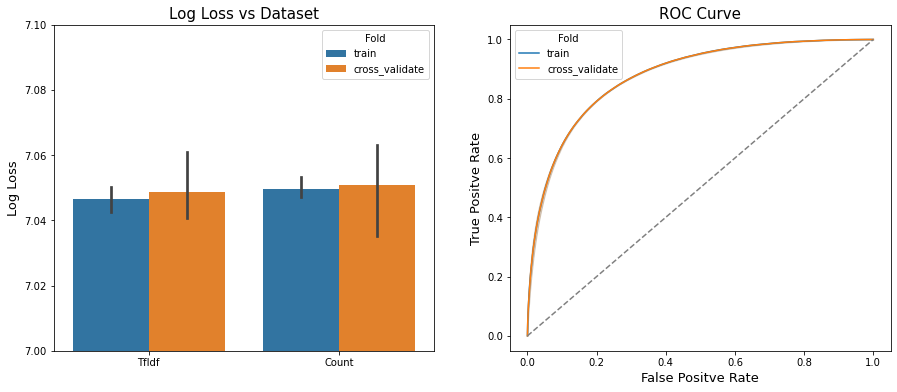

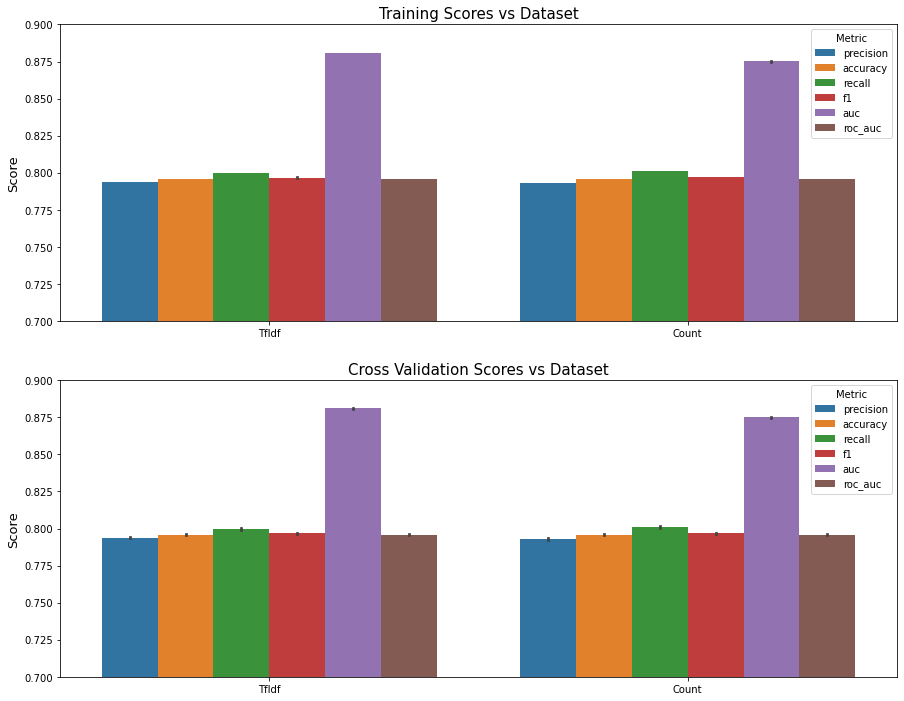

In [34]:
# Plot the metrics for training and validation datasets
plot_metrics(nb_gs)

Although `rand` did have the highest accuracy, `class_weight` had consistent performance with the training and validation dataset. 

In [35]:
# Fit grid search models with the best training dataset
# Specifying embedding to have better accuracy values
nb_gs.fit(X_train_vec[0], y_train)

Now, let's produce predictions based on the model grid. 

In [36]:
# Predict test and training datasets 
# Also get the metrics of fit
# Check if the models have not been predicted yet 
if not isinstance(nb_gs.predictions, pd.DataFrame):
    prep = Preprocess(transformer='tfidf',max_df=0.979,min_df=0.0201)
    nb_gs.predict(prep.transform(X_valid), y_valid, train_test='validate')
    nb_gs.predict(X_train_vec[-1], y_train, train_test='train')
nb_gs.predictions.head()

,train_test,preds,prob_preds,log_loss_score,accuracy,precision,recall,f1,fpr,tpr,auc,roc_auc
0,validate,"[1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, ...","[[0.3902222283229388, 0.6097777716770622], [0....",8.928094,0.741508,0.736084,0.752996,0.744444,"[0.0, 0.0, 0.0, 1.8518518518518519e-06, 1.8518...","[0.0, 1.8518518518518519e-06, 0.00014814814814...",0.821527,0.741508
1,validate,"[1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, ...","[[0.3902222283229388, 0.60977777167706], [0.72...",8.928094,0.741508,0.736084,0.752996,0.744444,"[0.0, 0.0, 0.0, 1.8518518518518519e-06, 1.8518...","[0.0, 1.8518518518518519e-06, 0.00014814814814...",0.821527,0.741508
2,validate,"[1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, ...","[[0.3902264776423026, 0.6097735223576966], [0....",8.928094,0.741508,0.736081,0.753004,0.744446,"[0.0, 0.0, 0.0, 1.8518518518518519e-06, 1.8518...","[0.0, 1.8518518518518519e-06, 0.00014814814814...",0.821528,0.741508
3,validate,"[1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, ...","[[0.3902264776423026, 0.6097735223576966], [0....",8.928094,0.741508,0.736081,0.753004,0.744446,"[0.0, 0.0, 0.0, 1.8518518518518519e-06, 1.8518...","[0.0, 1.8518518518518519e-06, 0.00014814814814...",0.821528,0.741508
0,train,"[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, ...","[[0.6285026028322631, 0.37149739716773683], [0...",16.562082,0.520480,0.566003,0.175625,0.268071,"[0.0, 7.936507936507937e-07, 7.936507936507937...","[0.0, 0.0, 1.5873015873015873e-06, 1.587301587...",0.540398,0.520480


Plotting metrics over the test dataset. 

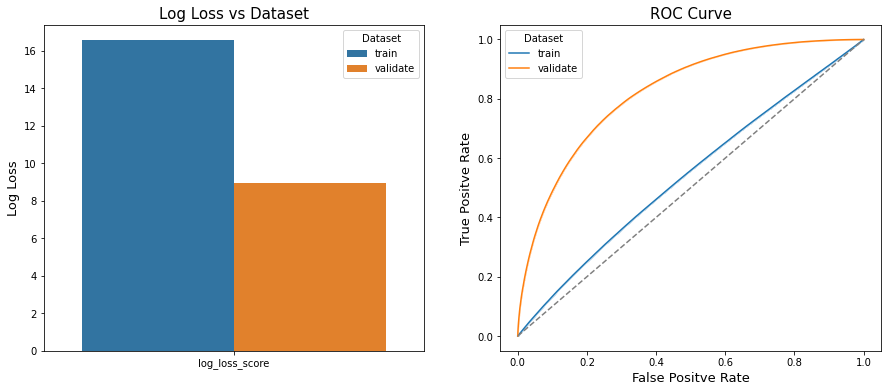

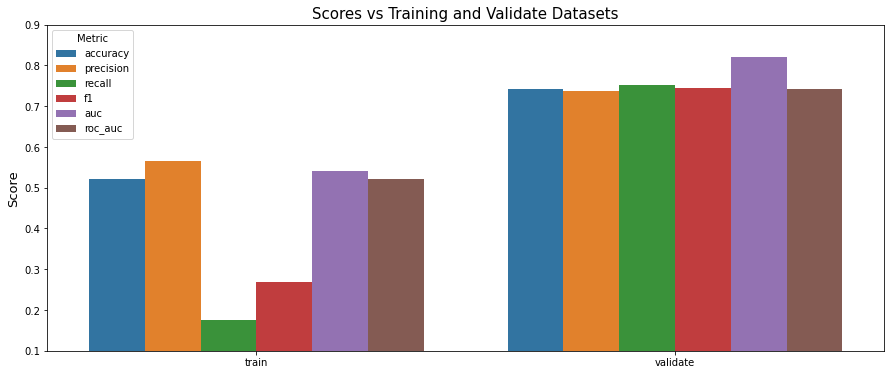

In [37]:
# Plot metrics for predicted values
plot_predictions(nb_gs, valid_test='validate')

Accuracy, recall and AUC are used to determine the best model.  

In [44]:
# Find the best model and model metrics based on given metrics 
best_nb_model, best_nb_model_metrics = nb_gs.best_model(metrics=metrics, 
                                                        valid_test='validate')
# Add predictions of the best model 
best_nb_model.predictions = nb_gs.predictions.loc[best_nb_model_metrics['index'],:]

# Store best model 
best_models.append(best_nb_model)

# Store the type of vectorization used 
vectorization_type.append('tfidf')

# Display best model parameters 
best_nb_model.get_params

<bound method BaseEstimator.get_params of MultinomialNB(alpha=1, fit_prior=False)>

In [45]:
# Best logreg model metrics
best_nb_model_metrics

index                                                             2
train_test                                                 validate
preds             [1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, ...
prob_preds        [[0.3902264776423026, 0.6097735223576966], [0....
log_loss_score                                              8.92809
accuracy                                                   0.741508
precision                                                  0.736081
recall                                                     0.753004
f1                                                         0.744446
fpr               [0.0, 0.0, 0.0, 1.8518518518518519e-06, 1.8518...
tpr               [0.0, 1.8518518518518519e-06, 0.00014814814814...
auc                                                        0.821528
roc_auc                                                    0.741508
Name: 0, dtype: object

Displaying the metrics for the best performing model and plotting the confusion matrix. 

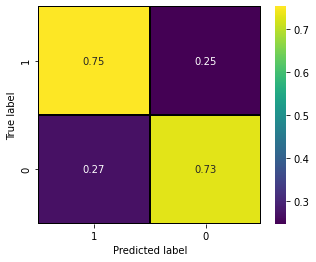

In [46]:
# Confusion matrix 
plot_confusion_matrix(y_valid, best_nb_model_metrics.preds, 
                      normalize='true')

In [47]:
# Save the grid search model if it does not exist
if not exists('nb_gs.pickle'):
    with open('nb_gs.pickle', 'wb') as f:    
        pickle.dump(nb_gs, f)

Surprisingly, the model did well for the true positive prediction at the cost of lower accuracy. This is acceptable given the class imbalance. 

In [48]:
# Delete 'nb_gs' for memory managment 
del nb_gs

### Logistic Regression

The first model used is logistic regression. Regularization factor, fit intercept, and L1 or L2 penalty were considered for grid search. `lbfgs` solver does not allow for L1 penalty. So, `liblinear` solver used instead. The downside is that ` liblinear` does not allow for parallelized jobs, which is why ‘n_jobs’ is missing as an input parameter.  

In [131]:
# Check if the variable exists
if not exists('logreg_gs.pickle'):    
    # Define regularization range 
    C = np.linspace(0.1, 1, 2)

    # Define parameters ranges 
    params = {'C':[str(s) for s in C],
              'fit_intercept':['False','True'],
              'max_iter':['1e3'],
              'n_jobs':['n_cpu'],
              'penalty':["'l2'","'none'"],
              'solver':["'lbfgs'"]}

    # Create a Custom_GridSearchCV instance
    logreg_gs = Custom_GridSearchCV('LogisticRegression', 
                                    param_grid=params, 
                                    cv=3)
else:
    with open('logreg_gs.pickle', 'rb') as f:
        logreg_gs = pickle.load(f)    

In [132]:
# Run cross-validation with accuracy as the primary scoring
rprt, rp_df, _ = logreg_gs.cross_validate(X_train_vec, y_train, 
                                          vectorization=vec_labels)

In orders to choose the best dataset to fit with the model, let's aggregate the metrics. Sorting the average accuracy, recall and AUC metrics yields: 

In [133]:
# Find training and validation metrics
logreg_gs_metrics_train,_,_ = prepare_metrics(logreg_gs, train_val='train')
logreg_gs_metrics_valid,_,_ = prepare_metrics(logreg_gs, train_val='cross_validate')

# Combine metrics 
logreg_gs_metrics = pd.concat([logreg_gs_metrics_train,logreg_gs_metrics_valid])

# Rename dataset as 'dataset_train/cross_validate'
logreg_gs_metrics.dataset = logreg_gs_metrics.dataset+'_'+logreg_gs_metrics.train_val

# Create a placeholder dataframe to store the average values
logreg_gs_metrics_mean = pd.DataFrame(columns=logreg_gs_metrics.metric.unique(),
                                  index=logreg_gs_metrics.dataset.unique())

# Iterate through each row and column, aggregate values and take the mean
for col in logreg_gs_metrics_mean.columns:
    for idx in logreg_gs_metrics_mean.index:
        avg = logreg_gs_metrics.loc[(logreg_gs_metrics.metric==col) & (logreg_gs_metrics.dataset==idx),'value']
        logreg_gs_metrics_mean.loc[idx,col] = avg.mean()

# Sort average metrics by recall, AUC and accuracy        
logreg_gs_metrics_mean.sort_values(by=metrics,ascending=False)

,precision,accuracy,recall,f1,auc,roc_auc
Embedding_train,0.820747,0.818354,0.814623,0.817673,0.898025,0.818354
Embedding_cross_validate,0.820664,0.81828,0.814564,0.817602,0.897943,0.81828
TfIdf_train,0.817185,0.815278,0.812272,0.814721,0.898081,0.815278
TfIdf_cross_validate,0.817037,0.815151,0.812178,0.8146,0.897996,0.815151
Count_train,0.81447,0.814901,0.815586,0.815028,0.894937,0.814901
Count_cross_validate,0.814388,0.814796,0.815444,0.814916,0.894852,0.814796


The performance metrics of the model are shown below. 

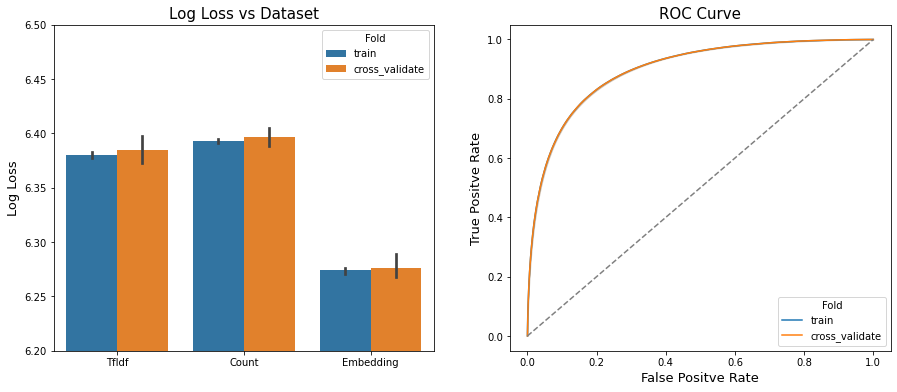

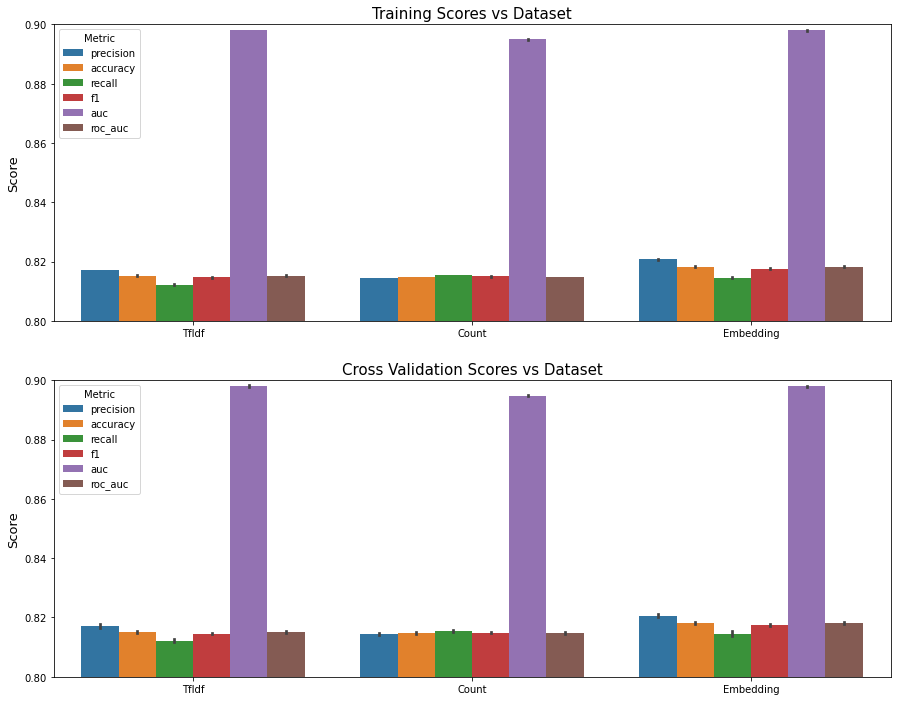

In [52]:
# Plot the metrics for training and cross_validation datasets
plot_metrics(logreg_gs)

Although `rand` did have the highest accuracy, `class_weight` had consistent performance with the training and validation dataset. 

In [53]:
# Fit grid search models with the best training dataset
# Specifying embedding to have better accuracy values
logreg_gs.fit(X_train_vec[-1], y_train)

Now, let's produce predictions based on the model grid. 

In [54]:
# Predict test and training datasets 
# Also get the metrics of fit
# Check if the models have not been predicted yet 
if not isinstance(logreg_gs.predictions, pd.DataFrame):
    prep = Preprocess(transformer='embed')
    logreg_gs.predict(prep.transform(X_valid), y_valid, train_test='validate')
    logreg_gs.predict(X_train_vec[-1], y_train, train_test='train')
logreg_gs.predictions.head()

,train_test,preds,prob_preds,log_loss_score,accuracy,precision,recall,f1,fpr,tpr,auc,roc_auc
0,validate,"[1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, ...","[[0.10269263594560363, 0.8973073640543964], [0...",6.279093,0.818204,0.820577,0.814502,0.817528,"[0.0, 0.0, 0.0, 1.8518518518518519e-06, 1.8518...","[0.0, 1.8518518518518519e-06, 2.96296296296296...",0.897989,0.818204
1,validate,"[1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, ...","[[0.11333726717753934, 0.8866627328224607], [0...",6.341967,0.816383,0.819056,0.812194,0.815611,"[0.0, 0.0, 0.0, 1.8518518518518519e-06, 1.8518...","[0.0, 1.8518518518518519e-06, 3.14814814814814...",0.896314,0.816383
2,validate,"[1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, ...","[[0.09999002092036968, 0.9000099790796303], [0...",6.276790,0.818270,0.820637,0.814580,0.817597,"[0.0, 0.0, 0.0, 1.8518518518518519e-06, 1.8518...","[0.0, 1.8518518518518519e-06, 2.77777777777777...",0.898036,0.818270
3,validate,"[1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, ...","[[0.11008529675875522, 0.8899147032412448], [0...",6.338897,0.816472,0.819134,0.812302,0.815704,"[0.0, 0.0, 0.0, 1.8518518518518519e-06, 1.8518...","[0.0, 1.8518518518518519e-06, 3.14814814814814...",0.896358,0.816472
4,validate,"[1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, ...","[[0.09411404120268296, 0.905885958797317], [0....",6.251685,0.818997,0.821230,0.815522,0.818366,"[0.0, 0.0, 0.0, 1.8518518518518519e-06, 1.8518...","[0.0, 1.8518518518518519e-06, 2.03703703703703...",0.898650,0.818997


Plotting metrics over the test dataset. 

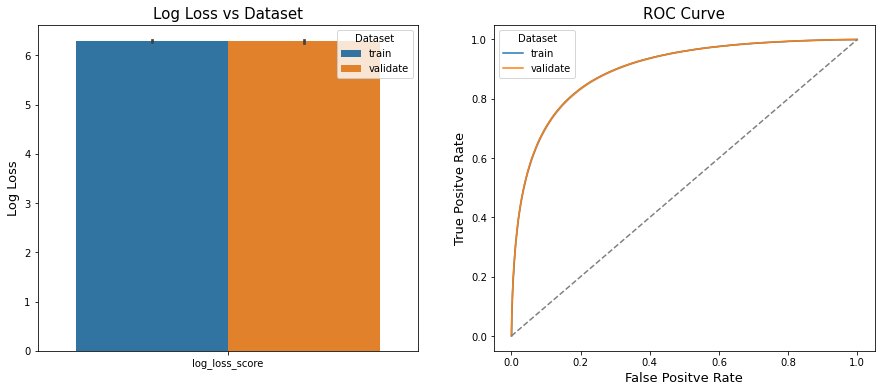

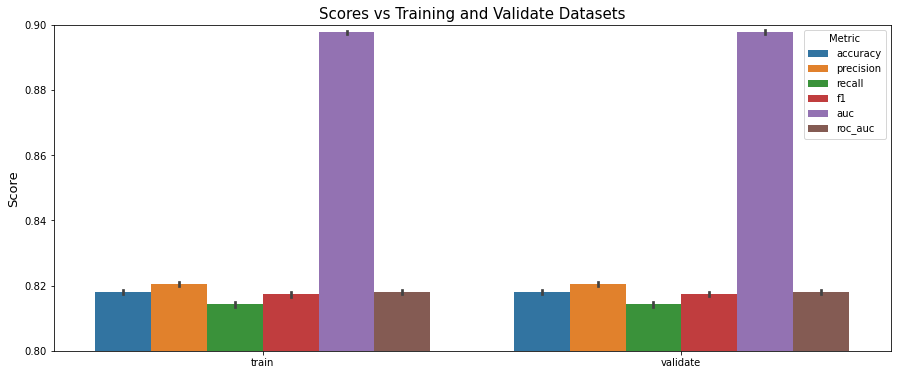

In [55]:
# Plot metrics for predicted values
plot_predictions(logreg_gs, valid_test='validate')

Accuracy, recall and AUC are used to determine the best model.  

In [134]:
# Find the best model and model metrics based on given metrics 
best_logreg_model, best_logreg_model_metrics = logreg_gs.best_model(metrics=metrics, 
                                                                    valid_test='validate')

# Add predictions 
best_logreg_model.predictions = logreg_gs.predictions.loc[best_logreg_model_metrics['index'],:]

# Store best model 
best_models.append(best_logreg_model)

# Store the type of vectorization used 
vectorization_type.append('embed')

# Display best model parameters 
best_logreg_model.get_params

<bound method BaseEstimator.get_params of LogisticRegression(max_iter=1000.0, penalty='l1', solver='liblinear')>

Displaying the metrics for the best performing model and plotting the confusion matrix. 

In [57]:
# Best logreg model metrics
best_logreg_model_metrics

index                                                             6
train_test                                                 validate
preds             [1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, ...
prob_preds        [[0.09158854373804315, 0.9084114562619569], [0...
log_loss_score                                              6.24957
accuracy                                                   0.819058
precision                                                  0.821295
recall                                                     0.815578
f1                                                         0.818426
fpr               [0.0, 0.0, 0.0, 1.8518518518518519e-06, 1.8518...
tpr               [0.0, 1.8518518518518519e-06, 2.22222222222222...
auc                                                          0.8987
roc_auc                                                    0.819058
Name: 0, dtype: object

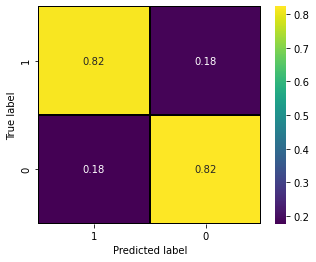

In [58]:
# Confusion matrix 
plot_confusion_matrix(y_valid, best_logreg_model_metrics.preds, 
                      normalize='true')

In [59]:
if not exists('logreg_gs.pickle'):
    with open('logreg_gs.pickle', 'wb') as f:    
        pickle.dump(logreg_gs, f)

In [60]:
# Delete 'logreg_gs' for memory managment 
del logreg_gs

Surprisingly, the model did well for the true positive prediction at the cost of lower accuracy. This is acceptable given the class imbalance. 

### Random Forest 

Now, let us apply the same method using random forest instead. Fewer parameters are used in lieu of memory requirements is larger parameter space were to be used.    

In [61]:
# Check if the variable exists
if not exists('rf_gs.pickle'):
    # Define n_estimators range
    n_estimators = np.arange(30, 100, 30)

    # Define min_sample_split range 
    min_samples_split = np.linspace(0.1, 1, 2, endpoint=True)

    # Define parameters ranges 
    params = {'max_depth':['None']+[str(s) for s in np.arange(1, 51, 20)],
              'min_samples_split':['2']+[str(s) for s in min_samples_split],
              'n_estimators':[str(n) for n in n_estimators],
              'n_jobs':['n_cpu'],
              'random_state':['SEED']}

    # Create a Custom_GridSearchCV instance
    rf_gs = Custom_GridSearchCV('RandomForestClassifier', param_grid=params, cv=3)
else:
    with open('rf_gs.pickle', 'rb') as f:
        rf_gs = pickle.load(f)

In [62]:
# Run cross-validation with recall as the primary scoring
rprt, rp_df,_ = rf_gs.cross_validate(X_train_vec, y_train,
                                     vectorization=vec_labels)

In [63]:
# Find training and validation metrics
rf_gs_metrics_train,_,_ = prepare_metrics(rf_gs, train_val='train')
rf_gs_metrics_valid,_,_ = prepare_metrics(rf_gs, train_val='cross_validate')

# Combine metrics 
rf_gs_metrics = pd.concat([rf_gs_metrics_train,rf_gs_metrics_valid])

# Rename dataset as 'dataset_train/validate'
rf_gs_metrics.dataset = rf_gs_metrics.dataset+'_'+rf_gs_metrics.train_val

# Create a placeholder dataframe to store the average values
rf_gs_metrics_mean = pd.DataFrame(columns=rf_gs_metrics.metric.unique(),
                                  index=rf_gs_metrics.dataset.unique())

# Iterate through each row and column, aggregate values and take the mean
for col in rf_gs_metrics_mean.columns:
    for idx in rf_gs_metrics_mean.index:
        avg = rf_gs_metrics.loc[(rf_gs_metrics.metric==col) & (rf_gs_metrics.dataset==idx),'value']
        rf_gs_metrics_mean.loc[idx,col] = avg.mean()

# Sort average metrics by recall, AUC and accuracy
rf_gs_metrics_mean.sort_values(by=metrics,ascending=False)

,precision,accuracy,recall,f1,auc,roc_auc
Embedding_train,0.999996,0.999997,0.999999,0.999997,1,0.999997
Count_train,0.998743,0.998919,0.999095,0.998919,0.999957,0.998919
TfIdf_train,0.99873,0.998872,0.999014,0.998872,0.999951,0.998872
TfIdf_cross_validate,0.821617,0.818173,0.81282,0.817195,0.900173,0.818173
Count_cross_validate,0.82091,0.817752,0.812833,0.816851,0.898059,0.817752
Embedding_cross_validate,0.802327,0.794856,0.782501,0.79229,0.875734,0.794856


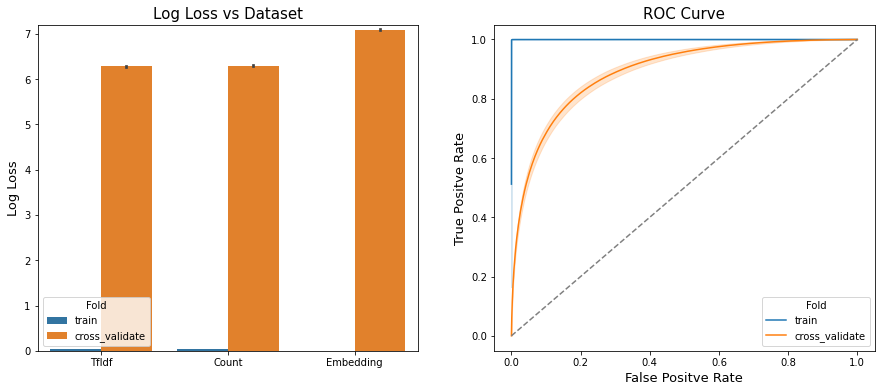

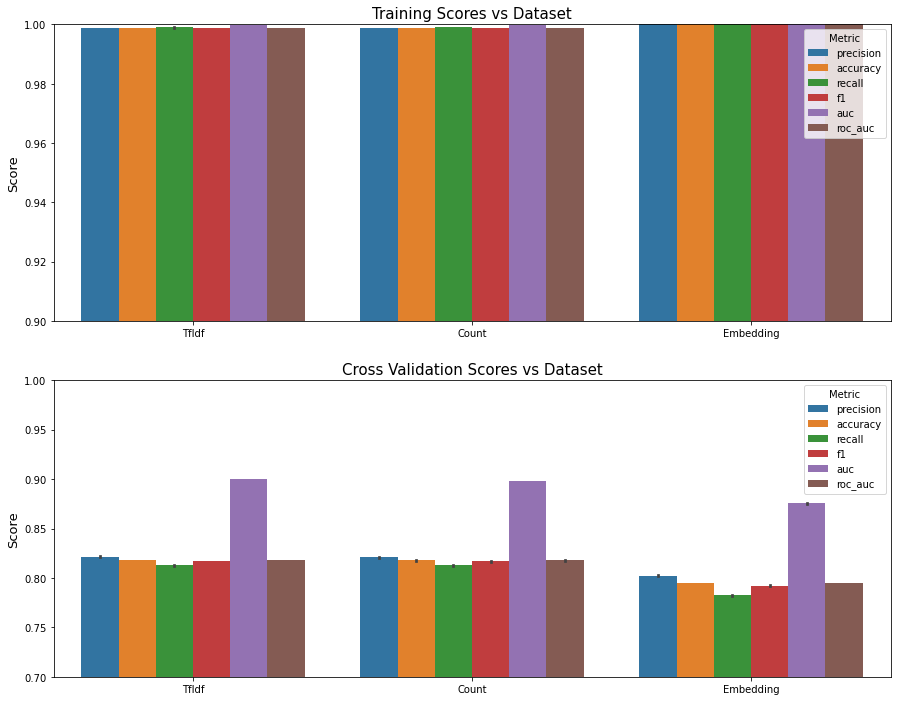

In [64]:
# Plot the metrics for training and validation datasets
plot_metrics(rf_gs)

In [65]:
# Fit grid search models with the best training dataset
# Specifying count to have better accuracy values
rf_gs.fit(X_train_vec[1], y_train)

In [66]:
# Predict test and training datasets 
# Also get the metrics of fit
# Check if the models have not been predicted yet 
if not isinstance(rf_gs.predictions, pd.DataFrame):
    prep = Preprocess(transformer='count',max_df=0.979,min_df=0.0201)
    rf_gs.predict(prep.transform(X_valid), y_valid, train_test='validate')
    rf_gs.predict(X_train_vec[1], y_train, train_test='train')
rf_gs.predictions.head()

,train_test,preds,prob_preds,log_loss_score,accuracy,precision,recall,f1,fpr,tpr,auc,roc_auc
0,validate,"[1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, ...","[[0.4, 0.6], [0.9333333333333333, 0.0666666666...",9.092399,0.736751,0.745597,0.718741,0.731923,"[0.0, 0.0035703703703703705, 0.003570370370370...","[0.0, 0.04157037037037037, 0.04157222222222222...",0.814314,0.736751
1,validate,"[1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, ...","[[0.4166666666666667, 0.5833333333333334], [0....",8.929812,0.741458,0.746196,0.731837,0.738947,"[0.0, 0.00135, 0.00135, 0.001351851851851852, ...","[0.0, 0.018962962962962963, 0.0189648148148148...",0.819023,0.741458
2,validate,"[1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, ...","[[0.45555555555555555, 0.5444444444444444], [0...",8.869370,0.743208,0.746700,0.736131,0.741378,"[0.0, 0.000787037037037037, 0.0007888888888888...","[0.0, 0.0119, 0.011901851851851853, 0.01190555...",0.820621,0.743208
3,validate,"[1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, ...","[[0.41687433882421165, 0.5831256611757883], [0...",9.860414,0.714515,0.725155,0.690885,0.707606,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.8518518518518519e-...","[0.0, 1.8518518518518519e-06, 7.40740740740740...",0.793539,0.714515
4,validate,"[1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, ...","[[0.39586407192093537, 0.6041359280790645], [0...",9.908514,0.713122,0.722352,0.692367,0.707042,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 3.7037037037037037e-06, 1.11111111111111...",0.790615,0.713122


In [67]:
# Remove models with recall=0 
rf_gs.predictions = rf_gs.predictions.loc[rf_gs.predictions.recall>0]
rf_gs.predictions.sort_values(by=['accuracy'], ascending=False).head()

,train_test,preds,prob_preds,log_loss_score,accuracy,precision,recall,f1,fpr,tpr,auc,roc_auc
2,train,"[1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, ...","[[0.022222222222222223, 0.9777777777777777], [...",0.039981,0.998842,0.998688,0.998998,0.998843,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.09147222222222222, 0.09147460317460318...",0.999952,0.998842
1,train,"[1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, ...","[[0.03333333333333333, 0.9666666666666667], [0...",0.042544,0.998768,0.998650,0.998887,0.998768,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.12794761904761906, 0.12794920634920634...",0.999948,0.998768
0,train,"[1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, ...","[[0.03333333333333333, 0.9666666666666667], [0...",0.067886,0.998035,0.998124,0.997944,0.998034,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.2186142857142857, 0.21861666666666665,...",0.999931,0.998035
29,train,"[1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, ...","[[0.18577950943446003, 0.8142204905655398], [0...",4.326794,0.874728,0.885868,0.860293,0.872893,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 7.936507936507937e-07, 0.000545238095238...",0.952465,0.874728
28,train,"[1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, ...","[[0.19003493807956573, 0.8099650619204344], [0...",4.339609,0.874357,0.885540,0.859853,0.872508,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 7.936507936507937e-07, 0.0008, 0.0008015...",0.952079,0.874357


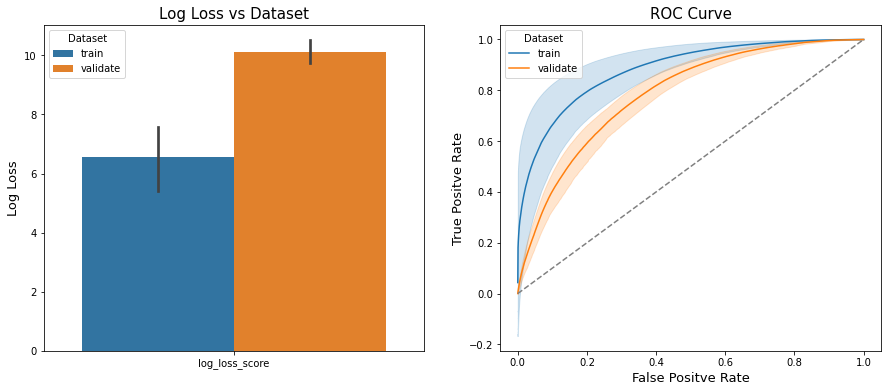

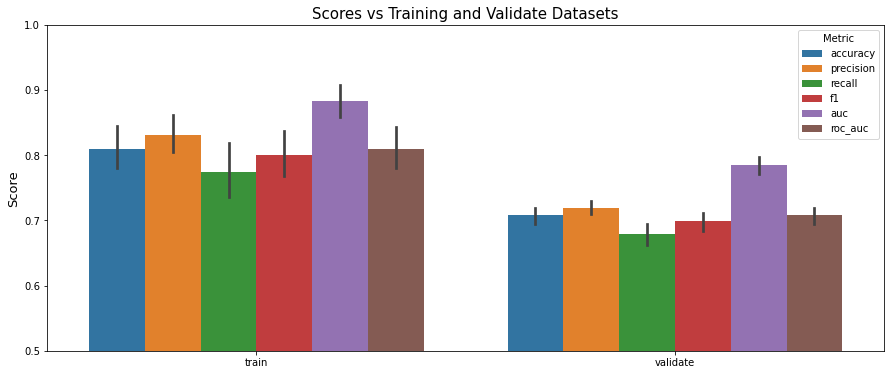

In [68]:
# Plot metrics for predicted values
plot_predictions(rf_gs, valid_test='validate')

In [69]:
# Find the best model and model metrics based on given metrics 
best_rf_model, best_rf_model_metrics = rf_gs.best_model(metrics=metrics, 
                                                        valid_test='validate')
# Add predictions 
best_rf_model.predictions = rf_gs.predictions.loc[best_rf_model_metrics['index'],:]

# Store best model 
best_models.append(best_rf_model)

# Store the type of vectorization used 
vectorization_type.append('count')

# Display best model parameters 
best_rf_model.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(n_estimators=90, n_jobs=7, random_state=123)>

In [70]:
# Best rf model metrics
best_rf_model_metrics

index                                                             2
train_test                                                 validate
preds             [1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, ...
prob_preds        [[0.45555555555555555, 0.5444444444444444], [0...
log_loss_score                                              8.86937
accuracy                                                   0.743208
precision                                                    0.7467
recall                                                     0.736131
f1                                                         0.741378
fpr               [0.0, 0.000787037037037037, 0.0007888888888888...
tpr               [0.0, 0.0119, 0.011901851851851853, 0.01190555...
auc                                                        0.820621
roc_auc                                                    0.743208
Name: 0, dtype: object

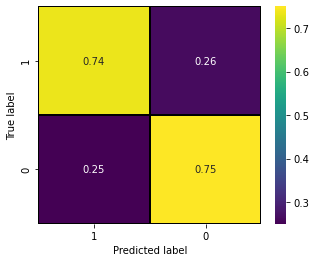

In [71]:
# Confusion matrix 
plot_confusion_matrix(y_valid, best_rf_model_metrics.preds, 
                      normalize='true');

In [72]:
if not exists('rf_gs.pickle'):
    with open('rf_gs.pickle', 'wb') as f:    
        pickle.dump(rf_gs, f)

In [73]:
# Delete 'rf_gs' for memory managment
del rf_gs

## Gradient Boosting

### XGBoost

In addition to the parameters used for random forest, learning rate is added as a parameter for XGBoost. Also notice that GPU is enabled for XGBoost. 

In [74]:
# Check if the variable exists
if not exists('xgb_gs.pickle'):

    # Define learning rate range
    learning_rate = [0.001,0.01]

    # Define min_child_weight range 
    min_child_weight = np.arange(1, 5, 2)

    # Define max_depth range 
    max_depth = np.arange(5, 10, 2)
          
    # Define parameters ranges 
    params = {'learning_rate': [str(l) for l in learning_rate],
              'max_depth': ['None']+[str(m) for m in max_depth],
              'min_child_weight': ['None']+[str(m) for m in min_child_weight],
              'random_state':['SEED'],
              'tree_method':["'gpu_hist'"]}

    # Create a Custom_GridSearchCV instance
    xgb_gs = Custom_GridSearchCV('XGBClassifier', param_grid=params, cv=3)
else:
    # Replace xgb_gs by model_cv[5]
    with open('xgb_gs.pickle', 'rb') as f:
        xgb_gs = pickle.load(f)   

In [75]:
# Run cross-validation with accuracy as the primary scoring
rprt, rp_df,_ = xgb_gs.cross_validate(X_train_vec, y_train, 
                                      vectorization=vec_labels)

In [76]:
# Find training and validation metrics
xgb_gs_metrics_train,_,_ = prepare_metrics(xgb_gs, train_val='train')
xgb_gs_metrics_valid,_,_ = prepare_metrics(xgb_gs, train_val='cross_validate')

# Combine metrics 
xgb_gs_metrics = pd.concat([xgb_gs_metrics_train,xgb_gs_metrics_valid])

# Rename dataset as 'dataset_train/validate'
xgb_gs_metrics.dataset = xgb_gs_metrics.dataset+'_'+xgb_gs_metrics.train_val

# Create a placeholder dataframe to store the average values
xgb_gs_metrics_mean = pd.DataFrame(columns=xgb_gs_metrics.metric.unique(),
                                  index=xgb_gs_metrics.dataset.unique())

# Iterate through each row and column, aggregate values and take the mean
for col in xgb_gs_metrics_mean.columns:
    for idx in xgb_gs_metrics_mean.index:
        avg = xgb_gs_metrics.loc[(xgb_gs_metrics.metric==col) & (xgb_gs_metrics.dataset==idx),'value']
        xgb_gs_metrics_mean.loc[idx,col] = avg.mean()
        
# Sort average metrics by accuracy, recall, and AUC
xgb_gs_metrics_mean.sort_values(by=metrics, ascending=False)

,precision,accuracy,recall,f1,auc,roc_auc
Embedding_train,0.831275,0.829816,0.827613,0.82944,0.911312,0.829816
TfIdf_train,0.830578,0.824984,0.816523,0.82349,0.908613,0.824984
Count_train,0.827883,0.823702,0.817327,0.822571,0.906611,0.823702
TfIdf_cross_validate,0.826826,0.821295,0.812835,0.819771,0.905168,0.821295
Embedding_cross_validate,0.822104,0.820751,0.818652,0.820374,0.903046,0.820751
Count_cross_validate,0.824881,0.820721,0.814321,0.819566,0.903706,0.820721


Clearly random oversampling is preferable over smote. But XGBoost takes a long time to run. This will be corrected next time. 

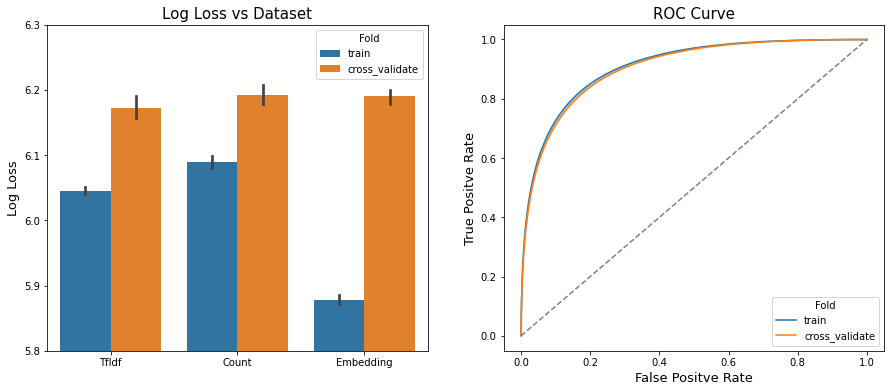

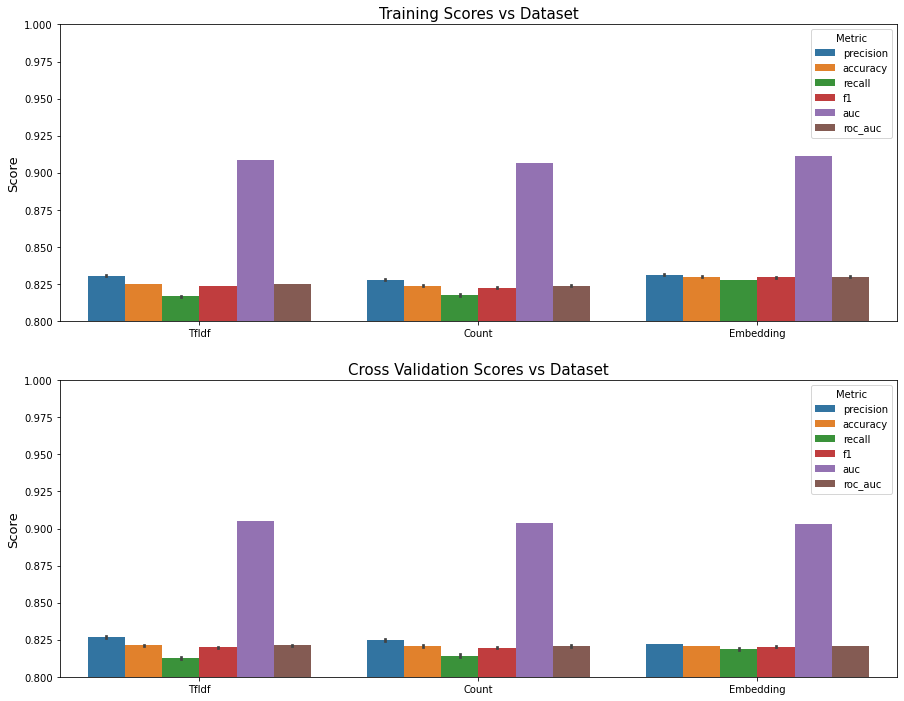

In [77]:
# Plot the metrics for training and validation datasets
plot_metrics(xgb_gs)

In [78]:
# Fit grid search models with the best training dataset
# SMOTE has better accuracy and recall values
# Therefore, 'class_weight' is disabled
xgb_gs.fit(X_train_vec[0], y_train)

In [79]:
# Predict test and training datasets 
# Also get the metrics of fit 
if not isinstance(xgb_gs.predictions, pd.DataFrame):
    prep = Preprocess(transformer='tfidf',max_df=0.979, min_df=0.0201)
    tmp = pd.DataFrame(prep.transform(X_valid), columns=xgb_gs.models[0].get_booster().feature_names)
    xgb_gs.predict(tmp, y_valid, train_test='validate')
    xgb_gs.predict(X_train_vec[0], y_train, train_test='train')
xgb_gs.predictions.head()

,train_test,preds,prob_preds,log_loss_score,accuracy,precision,recall,f1,fpr,tpr,auc,roc_auc
0,validate,"[1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, ...","[[0.48048568, 0.5195143], [0.52673846, 0.47326...",12.576460,0.635877,0.686039,0.501061,0.579138,"[0.0, 0.04490740740740741, 0.05688148148148148...","[0.0, 0.10247592592592593, 0.11983518518518518...",0.686112,0.635877
1,validate,"[1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, ...","[[0.48048097, 0.51951903], [0.52706206, 0.4729...",12.576875,0.635865,0.686044,0.501007,0.579104,"[0.0, 0.04490740740740741, 0.05687962962962963...","[0.0, 0.10247592592592593, 0.11983518518518518...",0.686117,0.635865
2,validate,"[1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, ...","[[0.4804814, 0.5195186], [0.5270652, 0.4729347...",12.576843,0.635866,0.686038,0.501022,0.579112,"[0.0, 0.04490740740740741, 0.05688333333333333...","[0.0, 0.10247407407407408, 0.11983333333333333...",0.686094,0.635866
3,validate,"[1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, ...","[[0.4918313, 0.5081687], [0.52714515, 0.472854...",12.680655,0.632860,0.679577,0.502785,0.577964,"[0.0, 0.011975925925925926, 0.0587759259259259...","[0.0, 0.01735925925925926, 0.12049814814814815...",0.679663,0.632860
4,validate,"[1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, ...","[[0.4918313, 0.5081687], [0.52714515, 0.472854...",12.680655,0.632860,0.679577,0.502785,0.577964,"[0.0, 0.011975925925925926, 0.0587759259259259...","[0.0, 0.01735925925925926, 0.12049814814814815...",0.679663,0.632860


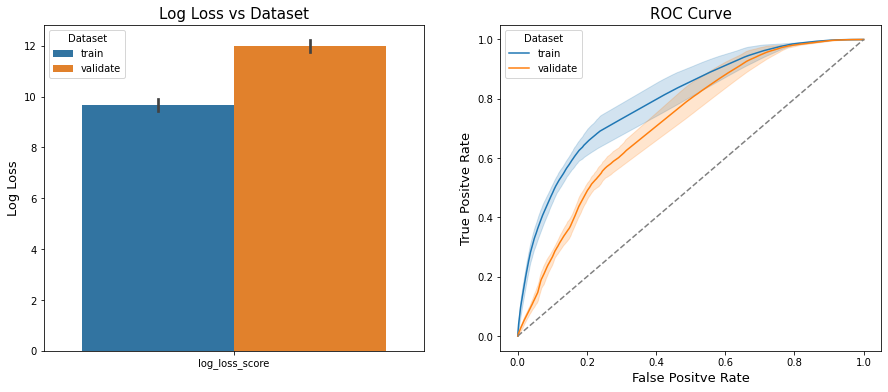

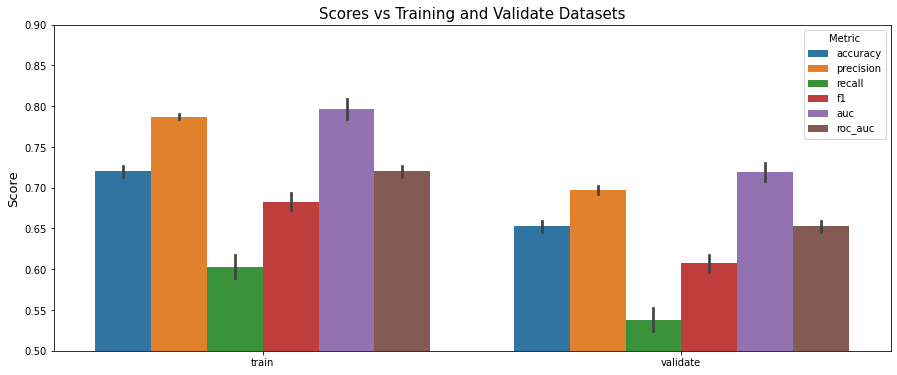

In [80]:
# Plot metrics for predicted values
plot_predictions(xgb_gs, valid_test='validate')

In [81]:
# Find the best model and model metrics based on given metrics 
best_xgb_model, best_xgb_model_metrics = xgb_gs.best_model(metrics=metrics, 
                                                           valid_test='validate')

# Add predictions 
best_xgb_model.predictions = xgb_gs.predictions.loc[best_xgb_model_metrics['index'],:]

# # Store best model 
best_models.append(best_xgb_model)

# Store the type of vectorization used 
vectorization_type.append('tfidf')

# Display best model parameters 
best_xgb_model.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=nan,
              monotone_constraints='(0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='gpu_hist', validate_parameters=1, verbosity=None)>

In [82]:
# Best DT model metrics 
best_xgb_model_metrics

index                                                            21
train_test                                                 validate
preds             [1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, ...
prob_preds        [[0.4159636, 0.5840364], [0.6635467, 0.3364533...
log_loss_score                                              11.1318
accuracy                                                   0.677706
precision                                                  0.713767
recall                                                     0.593357
f1                                                         0.648016
fpr               [0.0, 0.0, 0.0, 0.0, 0.0, 7.222222222222222e-0...
tpr               [0.0, 5.555555555555556e-06, 1.481481481481481...
auc                                                        0.758295
roc_auc                                                    0.677706
Name: 0, dtype: object

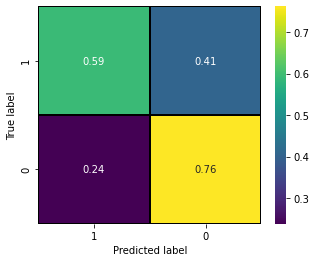

In [83]:
# Confusion matrix 
plot_confusion_matrix(y_valid, best_xgb_model_metrics.preds, 
                      normalize='true');

In [84]:
if not exists('xgb_gs.pickle'):
    with open('xgb_gs.pickle', 'wb') as f:    
        pickle.dump(xgb_gs, f)

In [85]:
# Delete 'xgb_gs' for memory managment 
del xgb_gs

### CatBoost

For CatBoost, border count, depth, iterations, l2 leaf regularization and learning rate were used as grid parameters. Similar to XGBoost, `GPU` are also enabled. Class weights were rejected by the model as those parameters needed to be defined along with `fit` function, which were not implemented in the `Custom_GridSearchCV` class.   

In [86]:
# Check if the variable exists
if not exists('cb_gs.pickle'):
    
    # Define parameters ranges 
    params = {'border_count':[100,200],
              'depth':np.arange(1,11,5),          
              'iterations':[500,1000],
              'l2_leaf_reg':[10,100],
              'learning_rate':[0.001,0.01],
              'logging_level':["'Silent'"],
              'random_state':['SEED'],
              'task_type':["'GPU'"],
              'thread_count':['n_cpu']}

    # Convert parameters to string 
    for key in params.keys():
        params[key] = [str(p) for p in params[key]]

    # Create a Custom_GridSearchCV instance
    cb_gs = Custom_GridSearchCV('CatBoostClassifier', param_grid=params, cv=3)
else:
    # Replace xgb_gs by model_cv[5]
    with open('cb_gs.pickle', 'rb') as f:
        cb_gs = pickle.load(f)   

In [87]:
# Run cross-validation with accuracy as the primary scoring
rprt, rp_df,_ = cb_gs.cross_validate(X_train_vec, y_train,
                                     vectorization=vec_labels)

In [88]:
# Find training and validation metrics
cb_gs_metrics_train,_,_ = prepare_metrics(cb_gs, train_val='train')
cb_gs_metrics_valid,_,_ = prepare_metrics(cb_gs, train_val='cross_validate')

# Combine metrics 
cb_gs_metrics = pd.concat([cb_gs_metrics_train,cb_gs_metrics_valid])

# Rename dataset as 'dataset_train/validate'
cb_gs_metrics.dataset = cb_gs_metrics.dataset+'_'+cb_gs_metrics.train_val

# Create a placeholder dataframe to store the average values
cb_gs_metrics_mean = pd.DataFrame(columns=cb_gs_metrics.metric.unique(),
                                  index=cb_gs_metrics.dataset.unique())

# Iterate through each row and column, aggregate values and take the mean
for col in cb_gs_metrics_mean.columns:
    for idx in cb_gs_metrics_mean.index:
        avg = cb_gs_metrics.loc[(cb_gs_metrics.metric==col) & (cb_gs_metrics.dataset==idx),'value']
        cb_gs_metrics_mean.loc[idx,col] = avg.mean()
        
# Sort average metrics by recall, AUC and accuracy
cb_gs_metrics_mean.sort_values(by=metrics,ascending=False)

,precision,accuracy,recall,f1,auc,roc_auc
Embedding_train,0.816862,0.814,0.809484,0.813156,0.896173,0.814
TfIdf_train,0.820011,0.813416,0.803112,0.811473,0.897557,0.813416
TfIdf_cross_validate,0.81939,0.812773,0.802416,0.810813,0.896874,0.812773
Embedding_cross_validate,0.815313,0.81255,0.808169,0.811725,0.894864,0.81255
Count_train,0.815936,0.81212,0.806082,0.810979,0.895285,0.81212
Count_cross_validate,0.815531,0.811728,0.805701,0.810586,0.894833,0.811728


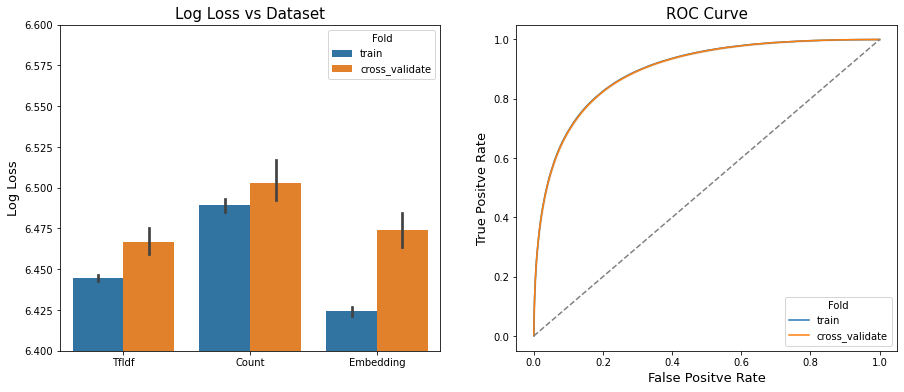

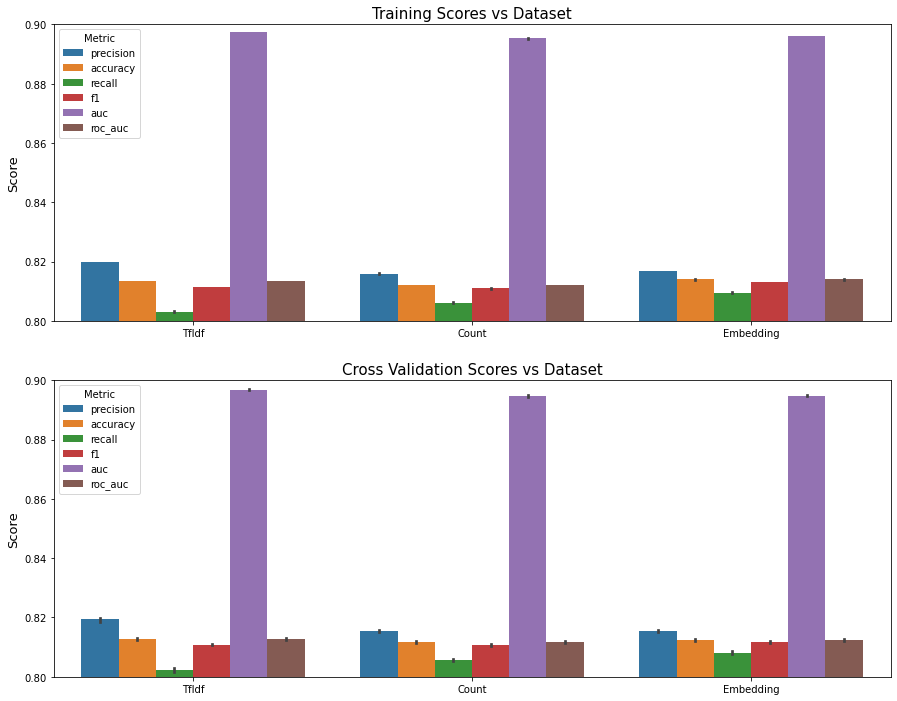

In [89]:
# Plot the metrics for training and validation datasets
plot_metrics(cb_gs)

SMOTE has the largest good tradeoff between accuracy and recall for the validation dataset. 

In [90]:
# Fit grid search models with the best training dataset
# SMOTE has better accuracy and recall values
# Therefore, 'class_weight' is disabled
cb_gs.fit(X_train_vec[-1], y_train)

In [91]:
# Predict test and training datasets 
# Also get the metrics of fit 
if not isinstance(cb_gs.predictions, pd.DataFrame):
    prep = Preprocess(transformer='embed')
    cb_gs.predict(prep.transform(X_valid), y_valid, train_test='validate')
    cb_gs.predict(X_train_vec[-1], y_train, train_test='train')
cb_gs.predictions.head()

,train_test,preds,prob_preds,log_loss_score,accuracy,precision,recall,f1,fpr,tpr,auc,roc_auc
0,validate,"[0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, ...","[[0.5397395104078336, 0.46026048959216637], [0...",12.535583,0.637062,0.633671,0.649746,0.641608,"[0.0, 0.010840740740740741, 0.0112962962962962...","[0.0, 0.08546666666666666, 0.08802037037037037...",0.703734,0.637062
1,validate,"[0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, ...","[[0.5536506883079098, 0.44634931169209024], [0...",9.620915,0.721449,0.726587,0.710111,0.718255,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 5.555555555555556e-05, 0.000120370370370...",0.796411,0.721449
2,validate,"[0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, ...","[[0.5397394705488654, 0.4602605294511346], [0....",12.535583,0.637062,0.633671,0.649746,0.641608,"[0.0, 0.010840740740740741, 0.0112962962962962...","[0.0, 0.08546666666666666, 0.08802037037037037...",0.703734,0.637062
3,validate,"[0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, ...","[[0.5536514013698142, 0.4463485986301858], [0....",9.620723,0.721455,0.726590,0.710122,0.718262,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 5.555555555555556e-05, 0.000120370370370...",0.796411,0.721455
4,validate,"[0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, ...","[[0.5588194018766796, 0.44118059812332044], [0...",11.576508,0.664830,0.664822,0.664852,0.664837,"[0.0, 0.0005925925925925926, 0.000618518518518...","[0.0, 0.013351851851851853, 0.0138074074074074...",0.733144,0.664830


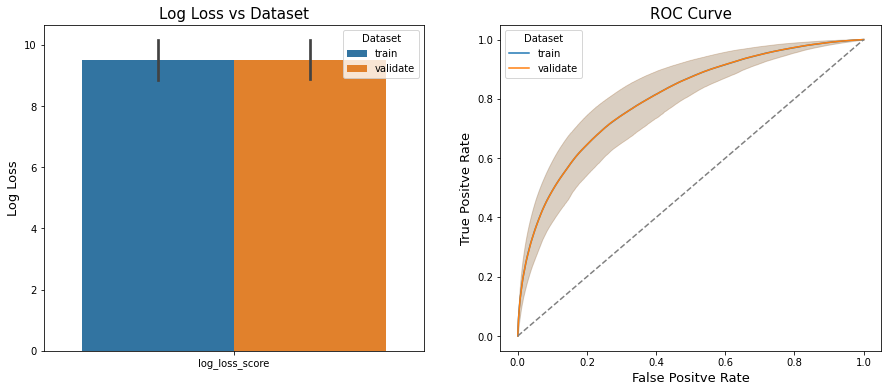

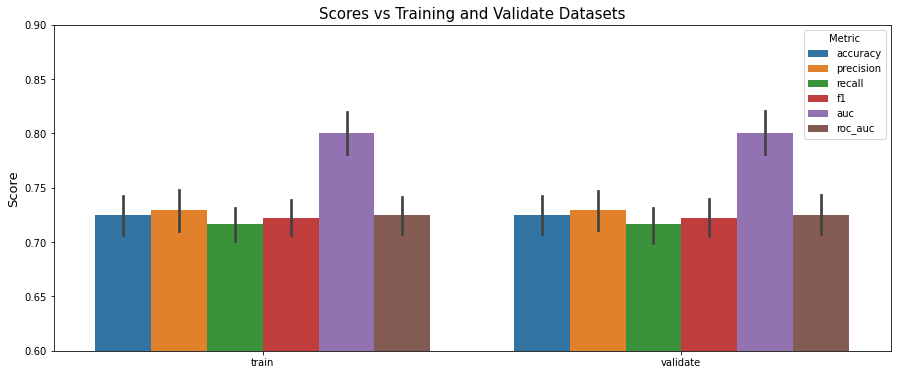

In [92]:
# Plot metrics for predicted values
plot_predictions(cb_gs, valid_test='validate')

CatBoost appears to have close prediction for training and validation test compared to the other models. This will be quantified later.

In [93]:
# Find the best model and model metrics based on given metrics 
best_cb_model, best_cb_model_metrics = cb_gs.best_model(metrics=metrics,
                                                       valid_test='validate')
# Add predictions 
best_cb_model.predictions = cb_gs.predictions.loc[best_cb_model_metrics['index'],:]

# # Store best model 
best_models.append(best_cb_model)

# Store the type of vectorization used 
vectorization_type.append('embed')

# Display best model parameters 
best_cb_model.get_params

<bound method CatBoost.get_params of <catboost.core.CatBoostClassifier object at 0x000001B9A9C4F880>>

In [94]:
# Best DT model metrics 
best_cb_model_metrics

index                                                            29
train_test                                                 validate
preds             [1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, ...
prob_preds        [[0.27241187914142595, 0.727588120858574], [0....
log_loss_score                                              6.96102
accuracy                                                    0.79846
precision                                                  0.803139
recall                                                     0.790743
f1                                                         0.796893
fpr               [0.0, 0.0, 0.0, 1.8518518518518519e-06, 1.8518...
tpr               [0.0, 1.8518518518518519e-06, 2.96296296296296...
auc                                                        0.881108
roc_auc                                                     0.79846
Name: 0, dtype: object

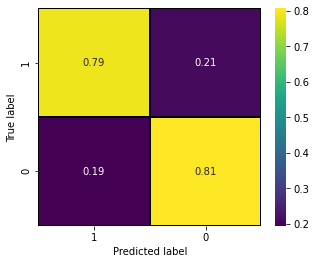

In [95]:
# Confusion matrix 
plot_confusion_matrix(y_valid, best_cb_model_metrics.preds, 
                      normalize='true');

The models can now be saved to file. 

In [96]:
if not exists('cb_gs.pickle'):
    with open('cb_gs.pickle', 'wb') as f:    
        pickle.dump(cb_gs, f)

In [97]:
# Delete 'cb_gs' for memory managment
del cb_gs

## Sequence Models 

### Long Short Term Memory 

In [98]:
def dnn_res_to_pd(y, prob_preds, train_test):
    # Empty dataframe to store results 
    tmp = {}
    # Populate 'tmp' with values
    # Calculate predictions
    preds = 1*(prob_preds>0.5)
    # Compute fpr and tpr 
    fpr, tpr, threshold = roc_curve(y, prob_preds)
    # Store metrics 
    tmp['train_test'] = train_test
    tmp['preds'] = [preds.T]
    tmp['prob_preds'] = [prob_preds.T]
    tmp['log_loss_score'] = log_loss(y, preds)
    tmp['accuracy'] = accuracy_score(y, preds)
    tmp['precision'] = precision_score(y, preds)
    tmp['recall'] = recall_score(y, preds)
    tmp['f1'] = f1_score(y, preds)
    tmp['fpr'] = [fpr]
    tmp['tpr'] = [tpr]
    tmp['auc'] = auc(fpr, tpr)
    tmp['roc_auc'] = roc_auc_score(y, preds)
    # Return dataframe 
    return pd.DataFrame(tmp)    

In [99]:
def build_lstm_model(embedding=None, MAX_LENGTH=None, MAX_FEATURES=None): 
    '''
    Function to build an LSTM model 
    embedding: Embedding matrix. default=None
    MAX_LENGTH: Maximum length of the input layer 
    MAX_FEATURES: Maximum features in the embedding layer
    '''
    # If embedding not specified, specify input and embedding layers, 
    # based on MAX_LENGTH and MAX_FEATURES
    if embedding is None:
        sequences = layers.Input(shape=(MAX_LENGTH,))
        embedded = layers.Embedding(MAX_FEATURES, 64)(sequences)
    # Else use defined, untrainable embedding matrix
    else:
        sequences = layers.Input(shape=(embedding.shape[1],))
        embedded = layers.Embedding(embedding.shape[0],embedding.shape[1], 
                                        weights=[embedding_matrix], 
                                        trainable=False)(sequences)
    # LSTM layers
    # CuDNNLSTM runs much faster than LSTM model
    x = layers.CuDNNLSTM(128, return_sequences=True)(embedded)
    # Specify dropout 
    x = layers.Dropout(0.2)(x)
    x = layers.CuDNNLSTM(128)(x)
    x = layers.Dropout(0.2)(x)
    x = layers.Dense(100, activation='relu')(x)
    x = layers.Dense(32, activation='relu')(x)   
    # Apply sigmoid for output layer
    predictions = layers.Dense(1, activation='sigmoid')(x)
    # Create model instance 
    model = models.Model(inputs=sequences, outputs=predictions)
    # Use Adam optimizer, binary cross entropy and accuracy metric
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [100]:
if not exists('lstm_model_no_weight.pickle'):
    # If pickled file not found, set fitted to False  
    fitted = False
    # Maximum features for LSTM model input 
    max_features = 20000
    # Initiallize tokenizer with max_features 
    tokenizer = Tokenizer(num_words=max_features)
    # Fit tokenizer to training data
    tokenizer.fit_on_texts(X_train)
    # Convert text to sequences for both training and validation dataset
    train_texts = tokenizer.texts_to_sequences(X_train)
    val_texts = tokenizer.texts_to_sequences(X_valid)
    # Apply padding based on the maximum training token     
    max_length = max(len(train_ex) for train_ex in train_texts)    
    train_texts = pad_sequences(train_texts, maxlen=max_length)
    val_texts = pad_sequences(val_texts, maxlen=max_length)
    # Build LSTM model
    lstm_model_no_weight = build_lstm_model(MAX_FEATURES=max_features,
                                           MAX_LENGTH=max_length)    
    # Save input parameters to file
    f = open('lstm_model_no_weight.pickle', 'wb')
    pickle.dump(tokenizer, f)
    pickle.dump(train_texts, f)
    pickle.dump(val_texts, f)
else:
    with open('lstm_model_no_weight.pickle', 'rb') as f:
        # Skip 'tokenizer'
        _ = pickle.load(f)
        # Skip 'train_texts'
        _ = pickle.load(f)
        # Skip 'val_texts'
        _ = pickle.load(f)       
        # Load model predictions on training data
        train_preds = pickle.load(f)        
        # Load model predictions on validation data
        val_preds = pickle.load(f)
    # Load pretrained model
    lstm_model_no_weight = keras.models.load_model('models/lstm_model_no_weight.h5')
    fitted = True 

In [101]:
# Display model summary 
lstm_model_no_weight.summary()

Model: "functional_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 167)]             0         
                                                                 
 embedding_7 (Embedding)     (None, 167, 64)           1280000   
                                                                 
 cu_dnnlstm_12 (CuDNNLSTM)   (None, 167, 128)          99328     
                                                                 
 dropout_10 (Dropout)        (None, 167, 128)          0         
                                                                 
 cu_dnnlstm_13 (CuDNNLSTM)   (None, 128)               132096    
                                                                 
 dropout_11 (Dropout)        (None, 128)               0         
                                                                 
 dense_21 (Dense)            (None, 100)             

In [102]:
# Fit the data if not fitted 
if not fitted:
    # Run model for a single epoch
    lstm_model_no_weight.fit(
            train_texts, 
            y_train, 
            batch_size=128,
            epochs=1,
            validation_data=(val_texts, y_valid));
    # Save fitted model to file
    lstm_model_no_weight.save('models/lstm_model_no_weight.h5', save_format='tf')

In [103]:
# Predict training and validation, and save to file 
if not fitted:
    train_preds = lstm_model_no_weight.predict(train_texts)
    val_preds = lstm_model_no_weight.predict(val_texts)
    # Save predictions to file 
    pickle.dump(train_preds, f)
    pickle.dump(val_preds, f)
    f.close()

In [104]:
# Convert predictions to dataframe 
predictions = pd.concat([dnn_res_to_pd(y_valid, val_preds,'validate'),
                         dnn_res_to_pd(y_train, train_preds,'train')])
# Add predictions to the model 
lstm_model_no_weight.predictions = predictions
lstm_model_no_weight.predictions

,train_test,preds,prob_preds,log_loss_score,accuracy,precision,recall,f1,fpr,tpr,auc,roc_auc
0,validate,"[[1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,...","[[0.9910585, 0.028316455, 0.0017643009, 0.8170...",2.884851,0.916476,0.920733,0.911417,0.916051,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 1.8518518518518519e-06, 5.92592592592592...",0.973753,0.916476
0,train,"[[1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,...","[[0.8621141, 0.004045642, 0.17851877, 0.127429...",2.616820,0.924236,0.928546,0.919207,0.923853,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 7.936507936507937e-07, 4.444444444444444...",0.977506,0.924236


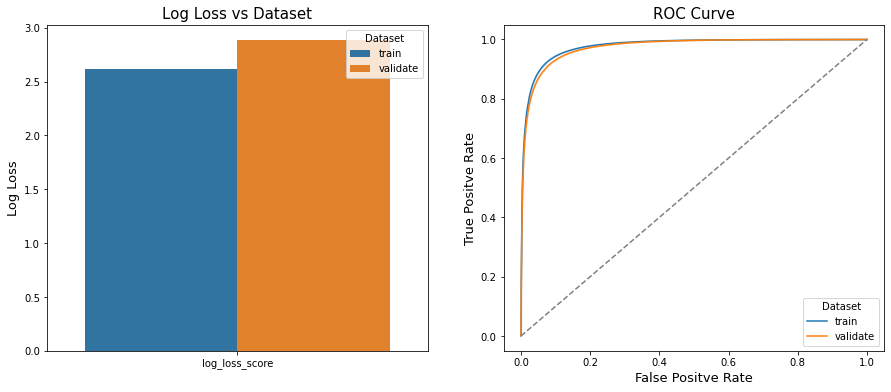

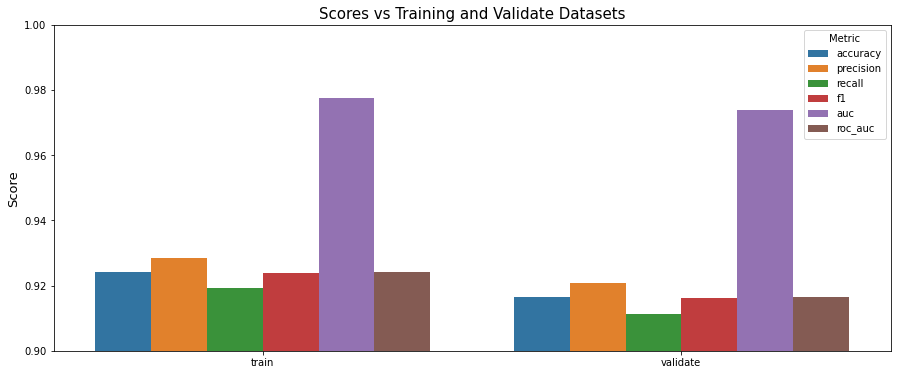

In [105]:
# Plot model performance on training and validation datasets
plot_predictions(lstm_model_no_weight, valid_test='validate')

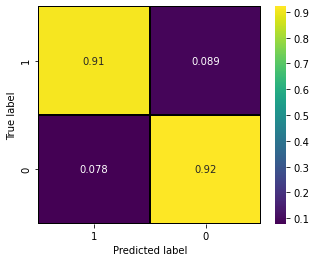

In [106]:
# Show the onfusion matrix 
plot_confusion_matrix(y_valid, 1*(val_preds>0.5), normalize='true')

In [107]:
# # Store best model 
best_models.append(lstm_model_no_weight)

# Store the type of vectorization used 
vectorization_type.append('tokenized-no-weight')

Now, let us use GloVe word embedding and retrain the model. First, the embedding matrix must be computed based on how many words have been tokenized.  

In [108]:
if not exists('lstm_model_glove.pickle'):
    fitted = False
    max_length = len(embeddings_index[next(iter(embeddings_index))])
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(X_train)
    train_texts = tokenizer.texts_to_sequences(X_train)
    val_texts = tokenizer.texts_to_sequences(X_valid)
    train_texts = pad_sequences(train_texts, maxlen=max_length)
    val_texts = pad_sequences(val_texts, maxlen=max_length)
    word_index = tokenizer.word_index
    embedding_matrix = np.zeros((len(word_index)+1, max_length))
    for word, i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
    lstm_model_glove = build_lstm_model(embedding=embedding_matrix)
    f = open('lstm_model_glove.pickle','wb')
    pickle.dump(tokenizer, f)
    pickle.dump(train_texts, f)
    pickle.dump(val_texts, f)
else:
    with open('lstm_model_glove.pickle','rb') as f:
        # Skip 'tokenizer'
        _ = pickle.load(f)
        # Skip 'train_texts'
        _ = pickle.load(f)
        # Skip 'val_texts'
        _ = pickle.load(f)      
        # Load model predictions on training data
        train_preds = pickle.load(f)
        # Load model predictions on validation data
        val_preds = pickle.load(f)
    # Load pretrained model
    lstm_model_glove = keras.models.load_model('models/lstm_model_glove.h5')
    fitted = True 

In [109]:
# Display model summary 
lstm_model_glove.summary()

Model: "functional_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 300)]             0         
                                                                 
 embedding_8 (Embedding)     (None, 300, 300)          90908400  
                                                                 
 cu_dnnlstm_14 (CuDNNLSTM)   (None, 300, 128)          220160    
                                                                 
 dropout_12 (Dropout)        (None, 300, 128)          0         
                                                                 
 cu_dnnlstm_15 (CuDNNLSTM)   (None, 128)               132096    
                                                                 
 dropout_13 (Dropout)        (None, 128)               0         
                                                                 
 dense_24 (Dense)            (None, 100)             

Clearly, using word embedding is going to exponentially increase our computation. But for the most part, the embedding layer is set to non-trainable.    

In [110]:
if not fitted:
    lstm_model_glove.fit(train_texts, 
                         y_train, 
                         batch_size=128, 
                         epochs=1,
                         validation_data=(val_texts, y_valid));
    lstm_model_glove.save('models/lstm_model_glove.h5', save_format='tf')

In [111]:
if not fitted:
    train_preds = lstm_model_glove.predict(train_texts)
    val_preds = lstm_model_glove.predict(val_texts)
    pickle.dump(train_preds, f)
    pickle.dump(val_preds, f)
    f.close()

In [112]:
predictions = pd.concat([dnn_res_to_pd(y_valid, val_preds,'validate'),
                         dnn_res_to_pd(y_train, train_preds,'train')])
lstm_model_glove.predictions = predictions
lstm_model_glove.predictions

,train_test,preds,prob_preds,log_loss_score,accuracy,precision,recall,f1,fpr,tpr,auc,roc_auc
0,validate,"[[1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,...","[[0.99480337, 0.014124167, 0.0027095953, 0.409...",3.052675,0.911617,0.939485,0.879911,0.908723,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 1.8518518518518519e-06, 3.51851851851851...",0.973686,0.911617
0,train,"[[1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,...","[[0.96191967, 0.010168016, 0.11027366, 0.14406...",2.895960,0.916154,0.943840,0.884964,0.913455,"[0.0, 0.0, 0.0, 0.0, 0.0, 7.936507936507937e-0...","[0.0, 7.936507936507937e-07, 1.587301587301587...",0.976052,0.916154


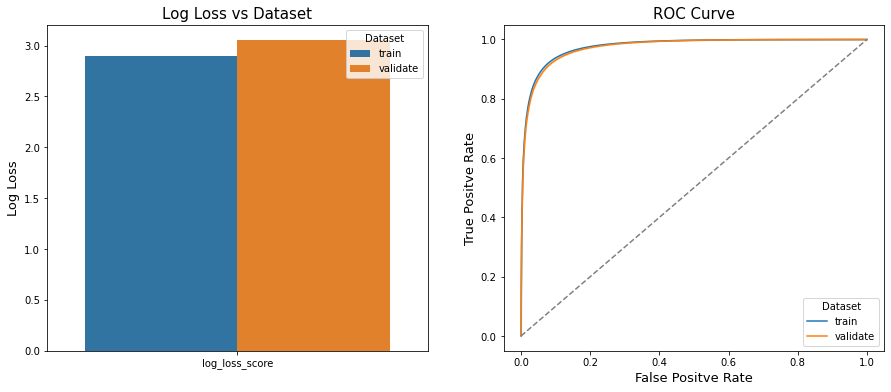

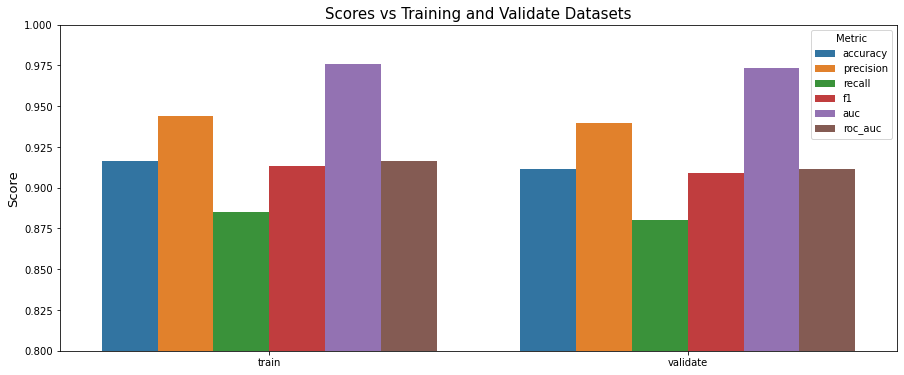

In [113]:
plot_predictions(lstm_model_glove, valid_test='validate')

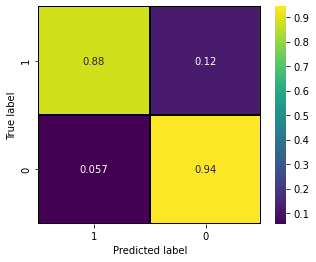

In [114]:
plot_confusion_matrix(y_valid, 1*(val_preds>0.5), normalize='true')

In [115]:
# # Store best model 
best_models.append(lstm_model_glove)

# Store the type of vectorization used 
vectorization_type.append('tokenized-glove')

## Transformer Models

### Bidirectional Encoder Representations from Transformers

Here is another implementation of BERT using DistelBERT.

In [116]:
def build_bert_text_model(MAX_LENGTH=None, MAX_FEATURES=None):    
    sequences = layers.Input(shape=(MAX_LENGTH,))
    embedded = layers.Embedding(MAX_FEATURES, 128)(sequences)
    x = layers.Conv1D(filters=100,
                      kernel_size=2,
                      padding="valid",
                      activation="relu")(embedded)
    x = layers.Conv1D(filters=100,
                      kernel_size=3,
                      padding="valid",
                      activation="relu")(x)
    x = layers.Conv1D(filters=50,
                      kernel_size=4,
                      padding="valid",
                      activation="relu")(x)
    x = layers.GlobalMaxPool1D()(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(rate=0.2)(x)
    predictions = layers.Dense(1, activation='sigmoid')(x)
    model = models.Model(inputs=sequences, outputs=predictions)
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [117]:
def tokenize_reviews(text_reviews):
    return tokenizer.convert_tokens_to_ids(tokenizer.tokenize(text_reviews))

In [118]:
MODEL_NAME = 'distilbert-base-uncased-finetuned-sst-2-english'
tokenizer = DistilBertTokenizer.from_pretrained(MODEL_NAME)
if not exists('bert_tokenized.pickle'):
    fitted = False
    # Load Tokenizer and Model
    train_tokenized = [tokenize_reviews(review) for review in tqdm(X_train.to_list())]
    val_tokenized = [tokenize_reviews(review) for review in tqdm(X_valid.to_list())]
    max_length = max(len(tokens) for tokens in train_tokenized)
    train_texts = pad_sequences(train_tokenized, maxlen=max_length)
    val_texts = pad_sequences(val_tokenized, maxlen=max_length)
    bert_model = build_bert_text_model(MAX_LENGTH=max_length, 
                                   MAX_FEATURES=len(tokenizer.vocab))
    f = open('bert_tokenized.pickle','wb')
    pickle.dump(train_texts, f)
    pickle.dump(val_texts, f)
else:
    with open('bert_tokenized.pickle','rb') as f:
        # Skip 'train_texts'
        _ = pickle.load(f)
        # Skip 'val_texts'
        _ = pickle.load(f)      
        # Load model predictions for training 
        train_preds = pickle.load(f)
        # Load model predictions for validation
        val_preds = pickle.load(f)
    # Load pretrained model
    bert_model = keras.models.load_model('models/bert_tokenized_model.h5')
    fitted = True    

In [119]:
bert_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 392)]             0         
                                                                 
 embedding (Embedding)       (None, 392, 128)          3906816   
                                                                 
 conv1d (Conv1D)             (None, 391, 100)          25700     
                                                                 
 conv1d_1 (Conv1D)           (None, 389, 100)          30100     
                                                                 
 conv1d_2 (Conv1D)           (None, 386, 50)           20050     
                                                                 
 global_max_pooling1d (Globa  (None, 50)               0         
 lMaxPooling1D)                                                  
                                                             

In [120]:
if not fitted:
    bert_model.fit(train_texts,
                   y_train,
                   batch_size=128,
                   epochs=1,
                   validation_data=(val_texts, y_valid));
    bert_model.save('models/bert_tokenized_model.h5', save_format='tf')

In [121]:
if not fitted:
    train_preds = bert_model.predict(train_texts)
    val_preds = bert_model.predict(val_texts)
    pickle.dump(train_preds, f)
    pickle.dump(val_preds, f)
    f.close()    

In [122]:
predictions = pd.concat([dnn_res_to_pd(y_valid, val_preds,'validate'),
                         dnn_res_to_pd(y_train, train_preds,'train')])
bert_model.predictions = predictions
bert_model.predictions

,train_test,preds,prob_preds,log_loss_score,accuracy,precision,recall,f1,fpr,tpr,auc,roc_auc
0,validate,"[[1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,...","[[0.99894893, 0.051377565, 0.0034568012, 0.788...",3.082980,0.910740,0.898169,0.926526,0.912127,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 1.8518518518518519e-06, 0.00012777777777...",0.970848,0.910740
0,train,"[[1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,...","[[0.96683025, 0.01142404, 0.74035144, 0.453830...",2.782287,0.919446,0.907125,0.934577,0.920646,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 7.936507936507937e-07, 3.968253968253968...",0.975247,0.919446


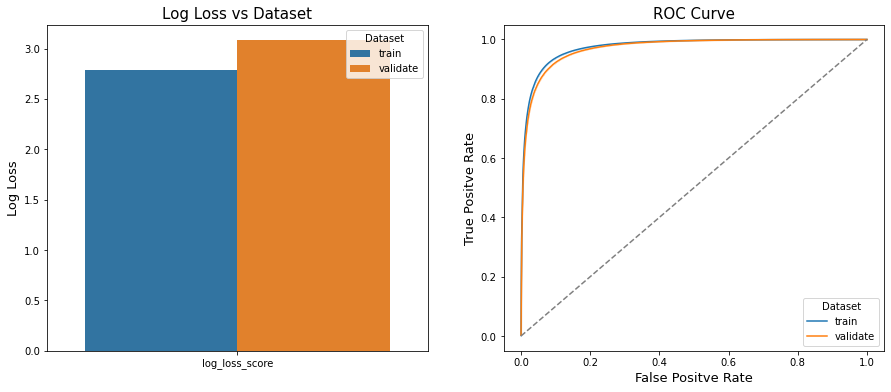

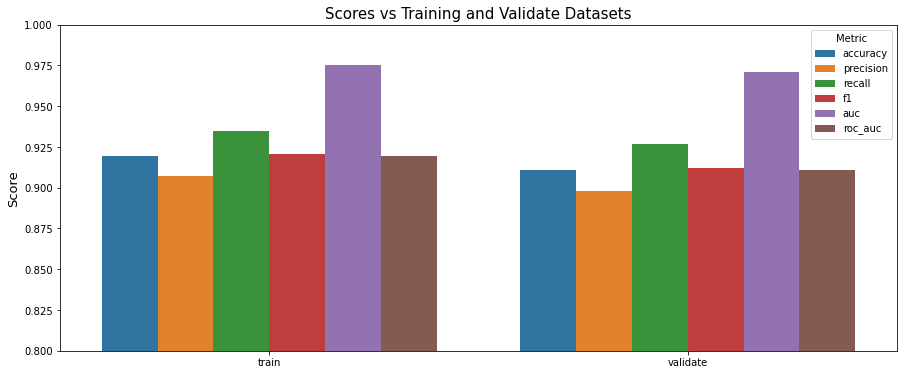

In [123]:
plot_predictions(bert_model, valid_test='validate')

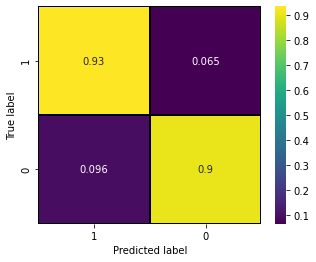

In [124]:
plot_confusion_matrix(y_train, 1*(train_preds>0.5), normalize='true')

In [125]:
# # Store best model 
best_models.append(bert_model)

# Store the type of vectorization used 
vectorization_type.append('tokenized-bert')

# Evaluation 

## Models' Performances

In [127]:
if exists('data/test.zip'):
    test_df = pd.read_csv('data/test.zip', compression='gzip')
    def str_cleaner(line):
        return line[1:-1].replace("'",'').replace(' ','').replace(',',' ')
    test_df.statements = test_df.statements.apply(str_cleaner)
else:
    test_file_lines = load_data('data/test.ft.txt.bz2')
    test_df = save_to_file(test_file_lines, 'train') 
    del train_file_lines

In [128]:
X_test, y_test = test_df.statements, test_df.labels
del test_df

In [129]:
test_dataset_dict = {}

prep = Preprocess(transformer='tfidf',max_df=0.98083,min_df=0.01917)
test_dataset_dict['tfidf'] = prep.transform(X_test, return_vectorizer=False)

prep = Preprocess(transformer='count',max_df=0.98083,min_df=0.01917)
test_dataset_dict['count'] = prep.transform(X_test, return_vectorizer=False)

prep = Preprocess(transformer='embed')
test_dataset_dict['embed'] = prep.transform(X_test)

with open('lstm_model_no_weight.pickle', 'rb') as f:
    tokenizer = pickle.load(f)
    train_texts = pickle.load(f)
test_texts = tokenizer.texts_to_sequences(X_test)
test_dataset_dict['tokenized-no-weight'] = pad_sequences(test_texts, 
                                                         maxlen=train_texts.shape[1])

with open('lstm_model_glove.pickle', 'rb') as f:
    tokenizer = pickle.load(f)
    train_texts = pickle.load(f)
test_texts = tokenizer.texts_to_sequences(X_test)
test_dataset_dict['tokenized-glove'] = pad_sequences(test_texts, 
                                                         maxlen=train_texts.shape[1])
with open('bert_tokenized.pickle', 'rb') as f:
    train_texts = pickle.load(f)
    
tokenizer = DistilBertTokenizer.from_pretrained(MODEL_NAME)
test_tokenized = [tokenize_reviews(review) for review in tqdm(X_test.to_list())]
test_dataset_dict['tokenized-bert'] = pad_sequences(test_tokenized, 
                                                    maxlen=train_texts.shape[1])

100%|██████████| 400000/400000 [09:37<00:00, 692.74it/s]


In [138]:
for model, vec in zip(best_models, vectorization_type):
    try:
        test_preds_prob = model.predict_proba(test_dataset_dict[vec])
        tmp_df = dnn_res_to_pd(y_test, test_preds_prob[:,1], 'test')
    except:
        test_preds_prob = model.predict(test_dataset_dict[vec])
        tmp_df = dnn_res_to_pd(y_test, test_preds_prob, 'test')        
    model.predictions = pd.concat([model.predictions, tmp_df])

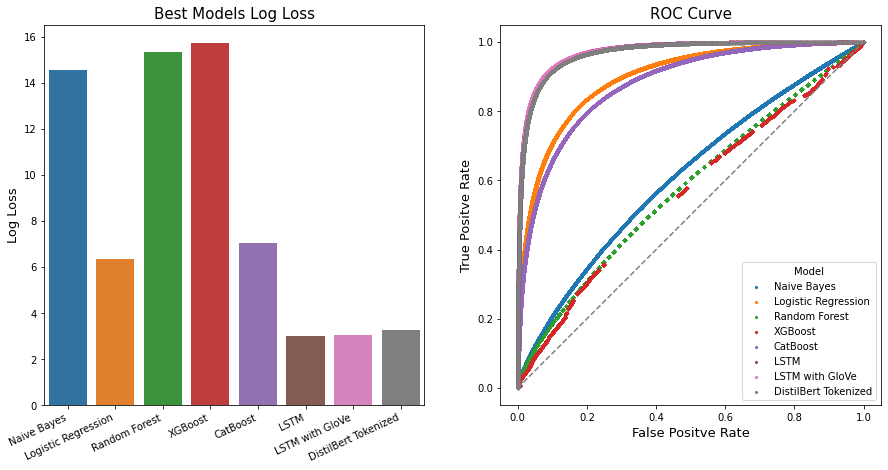

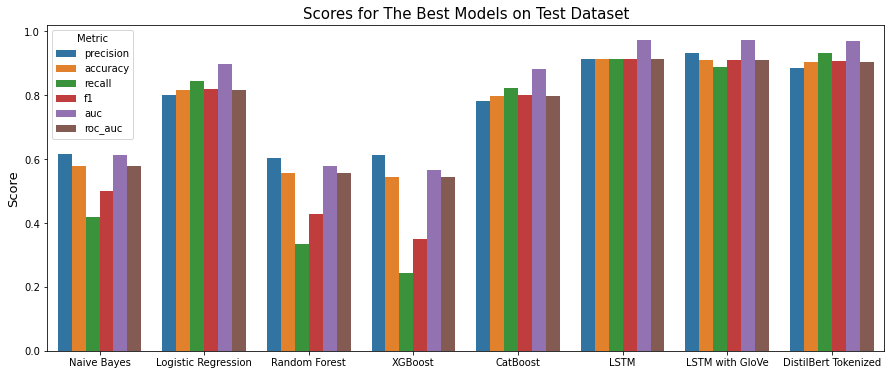

In [188]:
# Set columns 
columns = cb_gs_metrics_mean.columns

# Find the labels from the name of the models
labels = ['Naive Bayes','Logistic Regression', 'Random Forest', 
          'XGBoost', 'CatBoost', 'LSTM', 'LSTM with GloVe', 
          'DistilBert Tokenized']

# Iterate through each models
best_models_metrics = best_models[0].predictions.loc[best_models[0].predictions.train_test=='test']
for model in best_models[1:]:
    # Find test predictions in each model 
    tmp = model.predictions.loc[model.predictions.train_test=='test']
    best_models_metrics = pd.concat([best_models_metrics,tmp])

# Set labels as indices 
best_models_metrics.index = labels

# Create figure to plot log loss and ROC curve 
fig, axes = plt.subplots(1 , 2, figsize=(15,7))

# Log loss for the models  
g1 = sns.barplot(x=labels, y=best_models_metrics['log_loss_score'], ax=axes[0])

# Format labels and title 
g1.set_xlabel('')
g1.set_ylabel('Log Loss',fontsize=13)
g1.set_title('Best Models Log Loss',fontsize=15)
g1.set_xticklabels(g1.get_xticklabels(), rotation=25, 
                  horizontalalignment='right')

# Plot mean ROC curve for the best models
for idx in labels:
    g2 = sns.scatterplot(x=best_models_metrics.loc[idx,'fpr'], 
                         y=best_models_metrics.loc[idx,'tpr'], 
                         label=idx, ax=axes[1], linewidth=0, s=10)   
    
# Format labels and title 
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
g2.set_xlabel('False Positve Rate', fontsize=13)
g2.legend(title='Model')
g2.set_ylabel('True Positve Rate', fontsize=13)
g2.set_title('ROC Curve',fontsize=15)

# Save figure 
plt.savefig('images/best_model_log_and_roc.jpg');

# Plot metrics for the models
report_df = pd.DataFrame(columns=['model','value','metric'])
for col in columns:
    tmp_df = pd.DataFrame(columns=report_df.columns)
    tmp_df.value = best_models_metrics.loc[:, col]
    tmp_df.model = best_models_metrics.index    
    tmp_df.metric = col
    report_df = pd.concat([report_df, tmp_df], ignore_index=True)
fig, ax = plt.subplots(figsize=(15,6))
g3 = sns.barplot(x="model", y="value", hue="metric",
                     data=report_df, ax=ax)

# Format labels and title
g3.set_xlabel('')
g3.set_ylabel('Score', fontsize=13)
g3.set_title('Scores for The Best Models on Test Dataset',fontsize=15)
g3.legend(title='Metric');

# Save figure 
plt.savefig('images/best_model_performance.jpg');

## Final Model

In [174]:
# Copy best_models_metrics  
tmp_df = best_models_metrics.copy()

# Reset index
tmp_df = tmp_df.reset_index().reset_index()

# Sort values by difference between accuracy and recall 
tmp_df = tmp_df.sort_values(by='accuracy', ascending=False)

# Select the index of the first in the table 
idx = tmp_df.level_0.iloc[0]

# Final model
final_model =  best_models[idx]

# Print final model name and get parameters
print(labels[idx])
final_model.summary()

LSTM
Model: "functional_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 167)]             0         
                                                                 
 embedding_7 (Embedding)     (None, 167, 64)           1280000   
                                                                 
 cu_dnnlstm_12 (CuDNNLSTM)   (None, 167, 128)          99328     
                                                                 
 dropout_10 (Dropout)        (None, 167, 128)          0         
                                                                 
 cu_dnnlstm_13 (CuDNNLSTM)   (None, 128)               132096    
                                                                 
 dropout_11 (Dropout)        (None, 128)               0         
                                                                 
 dense_21 (Dense)            (None, 100)        

In [ ]:
with open('lstm_model_no_weight.pickle', 'rb') as f:
    # Skip 'tokenizer'
    _ = pickle.load(f)
    # Load 'train_texts'
    train_texts = pickle.load(f)
    # Load 'val_texts'
    val_texts = pickle.load(f)       

# Retrain model with more epochs 
history = final_model.fit(train_texts,
                          y_train,
                          batch_size=128,
                          epochs=10,
                          validation_data=(val_texts, y_valid));

Epoch 1/10
19688/19688 [==============================] - 1066s 54ms/step - loss: 0.1930 - accuracy: 0.9237 - val_loss: 0.1948 - val_accuracy: 0.9225
Epoch 2/10
19688/19688 [==============================] - 1057s 54ms/step - loss: 0.1712 - accuracy: 0.9335 - val_loss: 0.1927 - val_accuracy: 0.9240
Epoch 3/10
14833/19688 [=====================>........] - ETA: 3:40 - loss: 0.1523 - accuracy: 0.9418

In [ ]:
def plot_history(history):
    # Reset history
    history = history.history
    # Metrics for plotting 
    metrics = ['loss', 'accuracy', 'precision', 'recall']
    # Set epoch lengths as x-values
    epochs = list(range(1, len(history['loss'])+1))
    # Plot metrics 
    fig, axes = plt.subplots(2, 2, figsize=(15,15))
    # Iterate through each metrics
    for metric, ax in zip(metrics, axes.flatten()):
        # Plot training metrics 
        sns.plot(epochs, history[metric], label='Train', ax=ax)
        # Plot validation metrics 
        sns.plot(epochs, history['val_'+metric], label='Validate', ax=ax)
        # Set axis labels
        ax.set_xlabel('Epoch')
        ax.set_ylabel(metric.title())
        ax.legend();

In [ ]:
# Plot history 
plot_history(history)

In [ ]:
# Save final model for deployement
final_model.save('models/final_model.h5', save_format='tf')

## Model Interpretation 

## Web Deployment 

# Conclusion 

# Next Steps